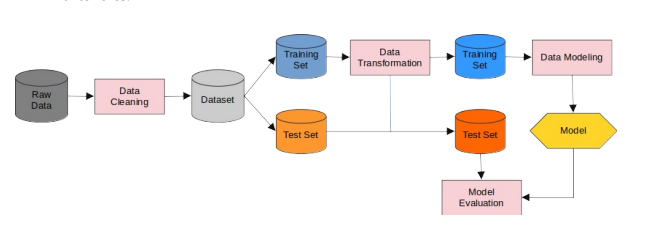

# **Inserindo o DataSet**

In [841]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [842]:
# Carregando dataset em formato Pandas Dataframe a partir do arquivo CSV
df = pd.read_csv('/content/UCMF.csv')

print(df.shape)
df.head()

(17873, 21)


,ID,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,1,5.0,51,19.0,11/05/06,30/03/06,0.12,GS,Normais,NaN,...,Não Calculado,Anormal,Normal,Sistólico,112,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,2,3.5,50,14.0,25/05/05,19/05/05,0.02,GS,Normais,NaN,...,Não Calculado,Anormal,Normal,ausente,128,Dispneia,NaN,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,3,0.0,0,NaN,12/06/01,08/05/05,-4.05,SULA,Normais,NaN,...,Não Calculado,Anormal,Normal,Sistólico,88,Assintomático,NaN,M,2 - Check-up,NaN
3,4,8.1,65,19.0,15/10/09,21/04/09,0.5,NaN,Normais,NaN,...,Não Calculado,Anormal,Normal,ausente,92,Assintomático,NaN,M,5 - Parecer cardiológico,NaN
4,5,39.5,142,20.0,23/01/09,24/10/99,9.6,Sulam,Normais,85.0,...,Normal,Anormal,Normal,ausente,90,NaN,NaN,M,5 - Parecer cardiológico,5 - Atividade física


- Remoção de colunas

In [843]:
df = df.drop(columns=['ID', 'Convenio', 'HDA2', 'Atendimento', 'DN'])

- Visualização dos dados

In [844]:
print(df.shape)
df.head(5)

(17873, 16)


,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
0,5.0,51,19.0,0.12,Normais,NaN,NaN,Não Calculado,Anormal,Normal,Sistólico,112,Palpitacao,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia
1,3.5,50,14.0,0.02,Normais,NaN,NaN,Não Calculado,Anormal,Normal,ausente,128,Dispneia,M,6 - Suspeita de cardiopatia,6 - Dispnéia
2,0.0,0,NaN,-4.05,Normais,NaN,NaN,Não Calculado,Anormal,Normal,Sistólico,88,Assintomático,M,2 - Check-up,NaN
3,8.1,65,19.0,0.5,Normais,NaN,NaN,Não Calculado,Anormal,Normal,ausente,92,Assintomático,M,5 - Parecer cardiológico,NaN
4,39.5,142,20.0,9.6,Normais,85.0,50.0,Normal,Anormal,Normal,ausente,90,NaN,M,5 - Parecer cardiológico,5 - Atividade física


# Limpeza dos dados


## Duplicatas

In [845]:
print(f'Número de linhas duplicadas: {df.duplicated().sum()}')
df[df.duplicated()].head()

Número de linhas duplicadas: 1039


,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
85,0.0,0,NaN,NaN,NaN,NaN,NaN,#VALUE!,NaN,NaN,NaN,NaN,NaN,Indeterminado,NaN,NaN
130,0.0,0,NaN,NaN,NaN,NaN,NaN,#VALUE!,NaN,NaN,NaN,NaN,NaN,Indeterminado,NaN,NaN
160,0.0,0,NaN,NaN,NaN,NaN,NaN,#VALUE!,NaN,NaN,NaN,NaN,NaN,Indeterminado,NaN,NaN
161,0.0,0,NaN,NaN,NaN,NaN,NaN,#VALUE!,NaN,NaN,NaN,NaN,NaN,Indeterminado,NaN,NaN
174,0.0,0,NaN,NaN,NaN,NaN,NaN,#VALUE!,NaN,NaN,NaN,NaN,NaN,Indeterminado,NaN,NaN


In [846]:
# Tratamento de linhas duplicadas
df = df.drop_duplicates()

print(f'Número de linhas duplicadas: {df.duplicated().sum()}')
print(f"Novo tamanho do dataset: {len(df)}")

Número de linhas duplicadas: 0
Novo tamanho do dataset: 16834


## Tratando Dados Faltantes

In [847]:
# Verificar valores faltantes por coluna
valores_faltantes_por_coluna = df.isna().sum()

print(df.shape)
print(valores_faltantes_por_coluna)

(16834, 16)
Peso                 315
Altura                 0
IMC                 3790
IDADE                471
PULSOS               425
PA SISTOLICA        6757
PA DIASTOLICA       6767
PPA                  214
NORMAL X ANORMAL     407
B2                   406
SOPRO                394
FC                  1249
HDA 1               4468
SEXO                   4
MOTIVO1              196
MOTIVO2             3856
dtype: int64


In [848]:
print(len(df))

16834


**Utilizando msno para:**
- gerar matriz de valores faltantes
- gerar heatmap de correlação, indicando quais colunas tendem a ter valores faltando juntas

<Axes: >

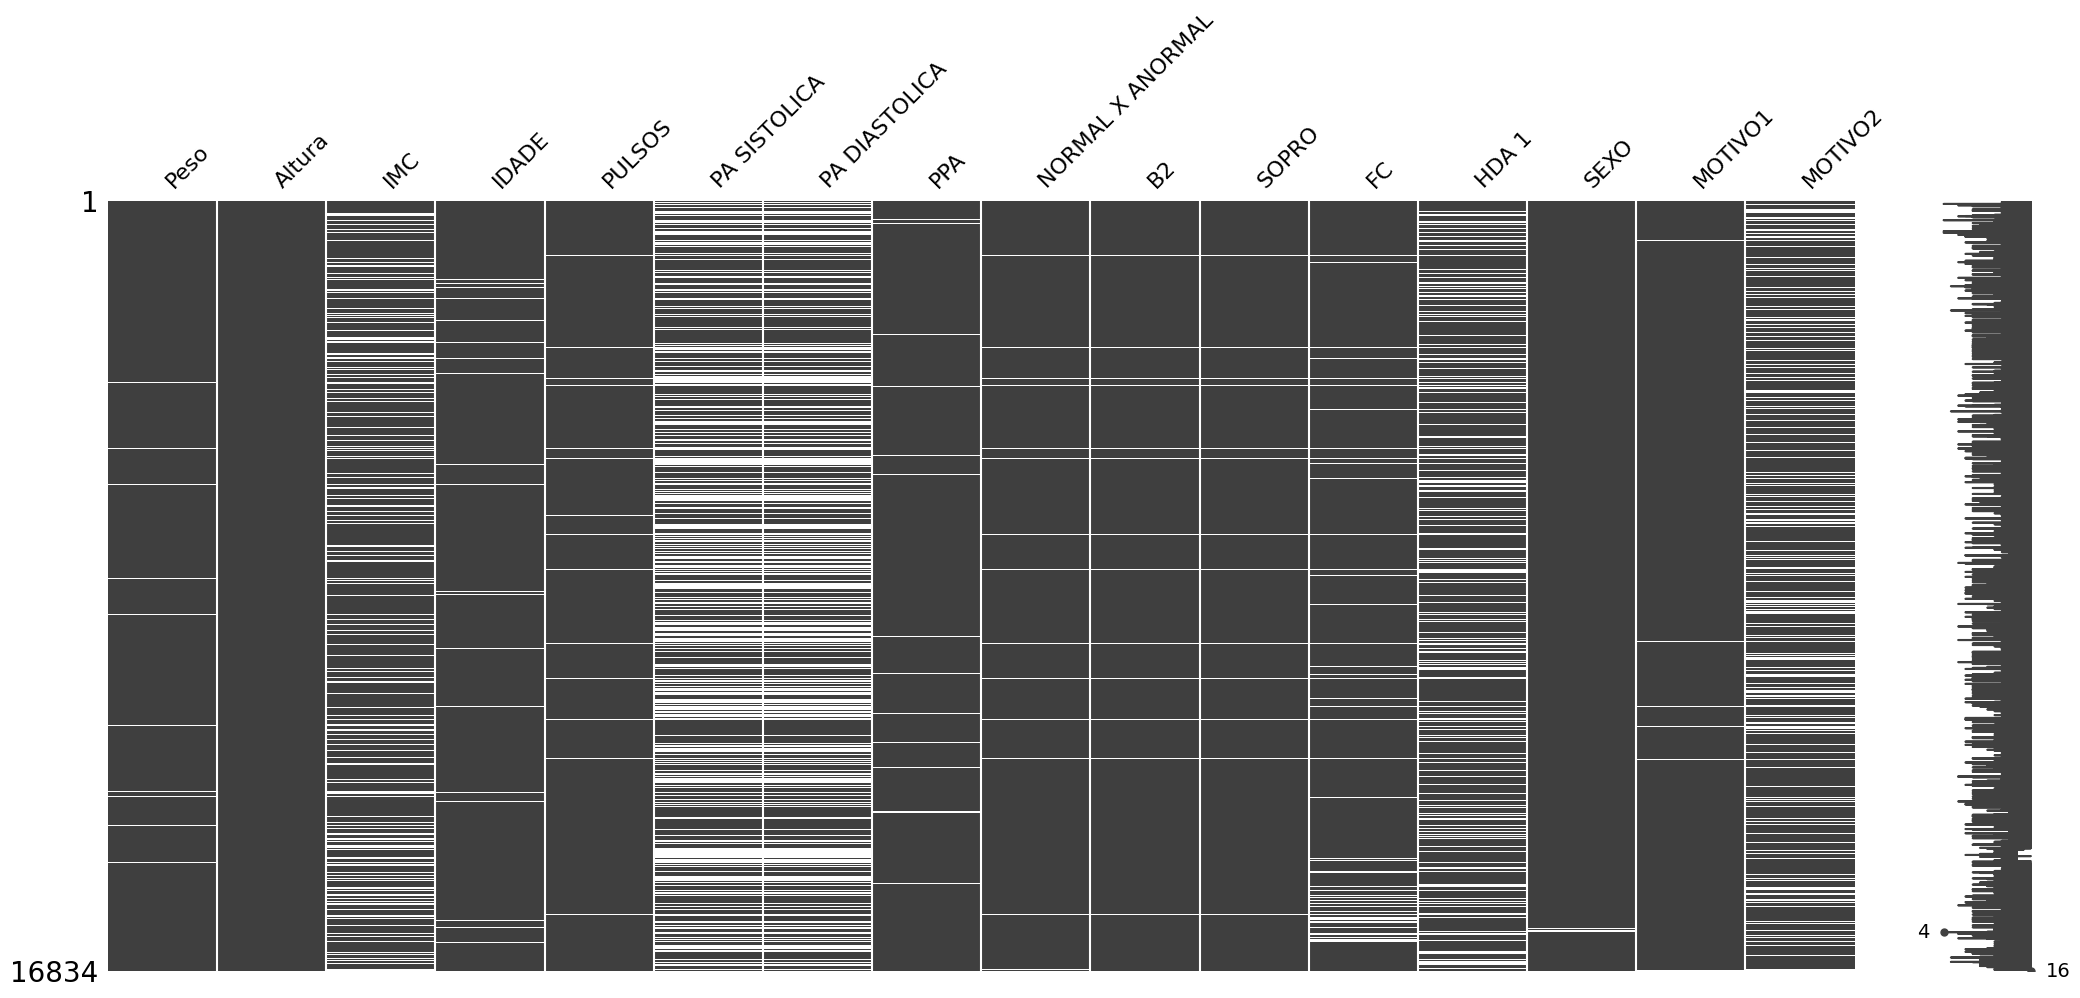

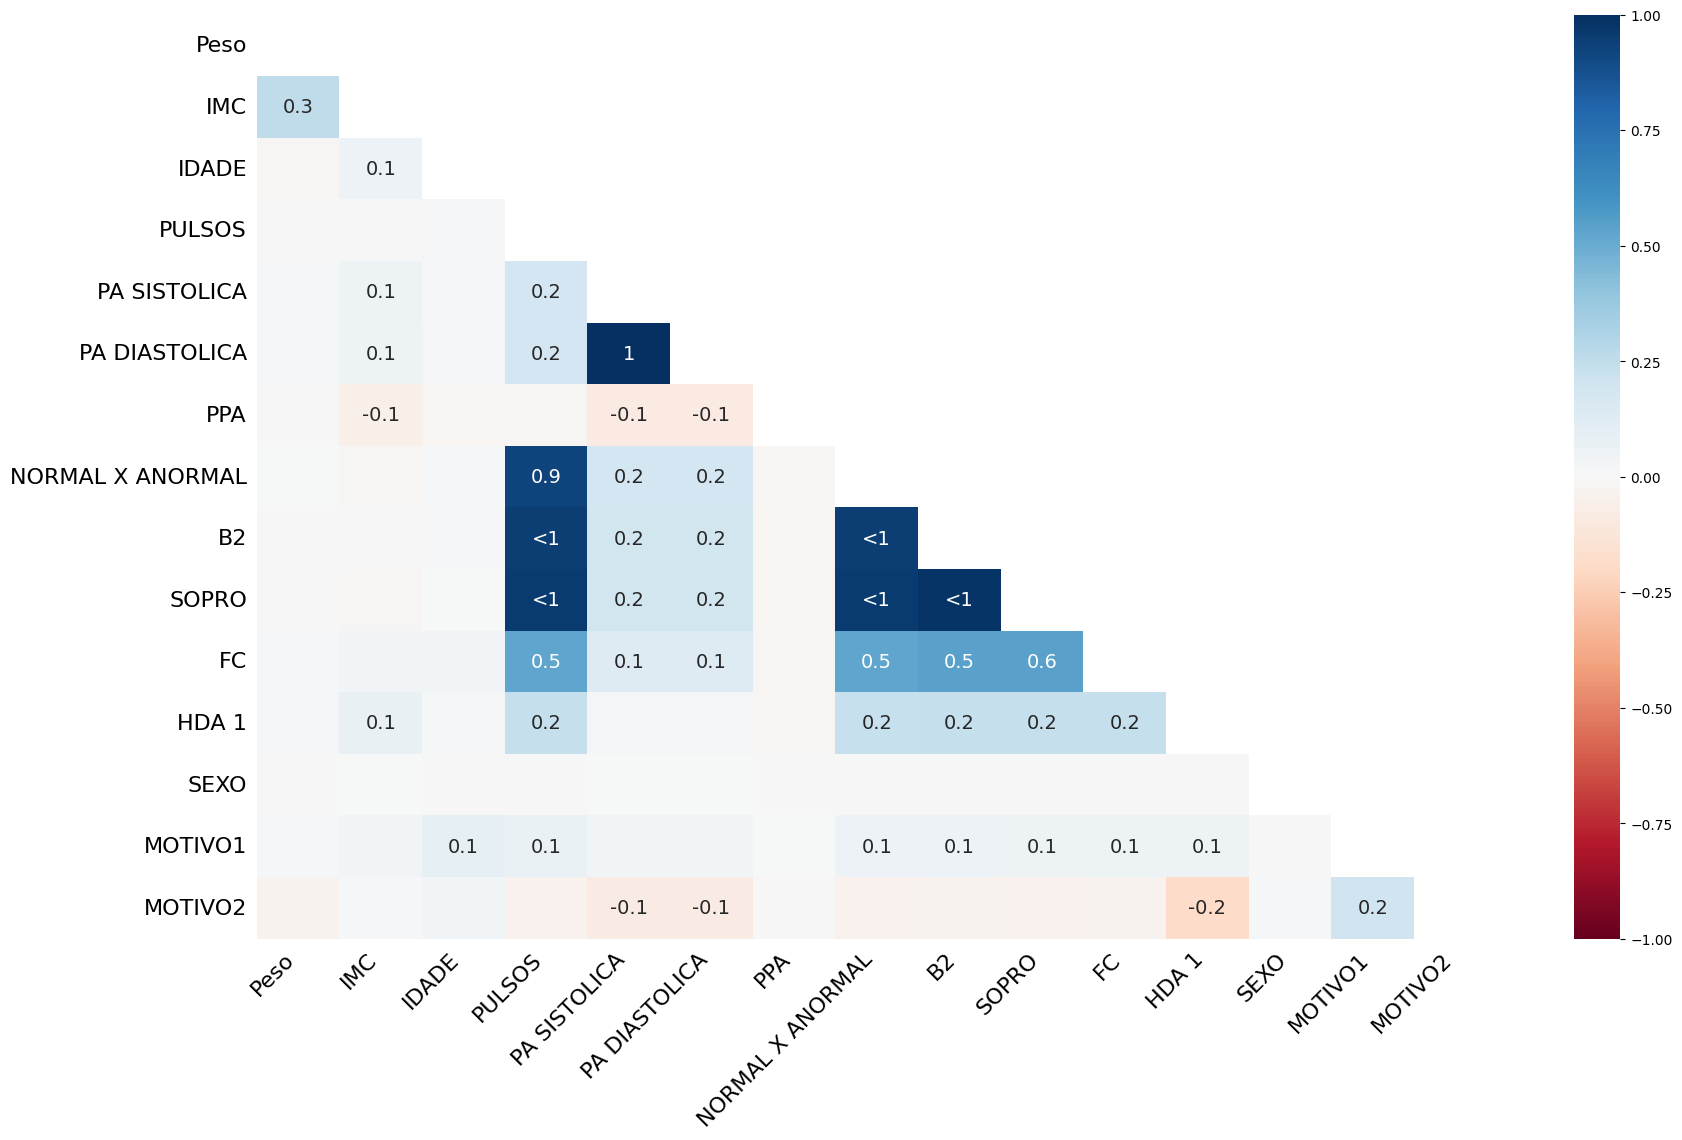

In [849]:
import missingno as msno
msno.matrix(df)
msno.heatmap(df)

# Variável Target
+- 6000 registros "NaN"

In [850]:
# Substitua 'target' pelo nome da sua variável alvo
target_nulos = df[df['NORMAL X ANORMAL'].isna()]

# Exibir os registros com target nulo
print(f"Número de registros com target nulo: {len(target_nulos)}")
print(target_nulos.head(15))

# Possível de observar registros inconsistentes

Número de registros com target nulo: 407
     Peso  Altura   IMC  IDADE PULSOS  PA SISTOLICA  PA DIASTOLICA  \
64    0.0       0   NaN    NaN    NaN           NaN            NaN   
81    0.0       0   NaN   1.79    NaN           NaN            NaN   
86   39.6       0   NaN   9.13    NaN           NaN            NaN   
94   24.1     122  16.0   8.51    NaN           NaN            NaN   
114  29.0     135  16.0   9.92    NaN           NaN            NaN   
187  28.0     129  17.0   7.64    NaN           NaN            NaN   
212  24.0     115  18.0   7.68    NaN           NaN            NaN   
224  55.0     179  17.0  17.74    NaN           NaN            NaN   
325  43.1     141  22.0  10.19    NaN           NaN            NaN   
342  62.0     157  25.0     11    NaN           NaN            NaN   
347  44.0     149  20.0  12.22    NaN           NaN            NaN   
357  15.0      99  15.0   3.03    NaN           NaN            NaN   
371  20.0     108  17.0   4.33    NaN           N

In [851]:
#Removendo Registros que possuem a variável target como "NaN"

df = df.dropna(subset=['NORMAL X ANORMAL'])


In [852]:
print(df.shape)

(16427, 16)


# PESO

Os registros que Peso = 0.0 são registros inconsistenses, poucos atributos preenchidos

- > exclusão dos registros onde peso == 0.0

In [853]:
# Remover registros onde o Peso é igual a 0
df = df[df['Peso'] != 0]

print(f"Número de registros restantes: {len(df)}")


Número de registros restantes: 14782


- Alguns registros são outliers - substituindo pelo cálculo do IMC - ALTURA

In [854]:
# Calcular Q1, Q3 e IQR
Q1 = df['Peso'].quantile(0.25)
Q3 = df['Peso'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover os outliers do DataFrame
df = df[(df['Peso'] >= limite_inferior) & (df['Peso'] <= limite_superior)]


In [855]:
peso_outlier = df[df['Peso'] == 0]

print(f" {len(peso_outlier)}")

peso_outlier.head()


 0


,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2


Disposição dos registros na coluna 'Peso':
count    14111.000000
mean        23.523457
std         14.893078
min          0.300000
25%         12.500000
50%         20.000000
75%         32.600000
max         65.900000
Name: Peso, dtype: float64


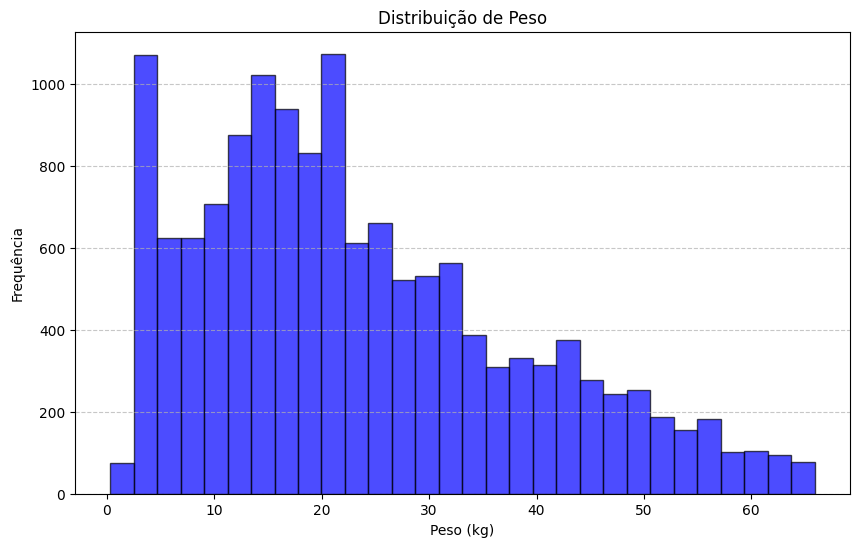

In [856]:
# Descrever a disposição dos dados da coluna "Peso"
descricao_peso = df['Peso'].describe()

# Exibir a descrição estatística de "Peso"
print("Disposição dos registros na coluna 'Peso':")
print(descricao_peso)

# Gerar um histograma para visualizar a distribuição de "Peso"
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Peso'].dropna(), bins=30, edgecolor='black', color='blue', alpha=0.7)
plt.title('Distribuição de Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [857]:
peso_zero = df[df['Peso'] == 0]
print(peso_zero.head(3))

#contagem
print("")
peso_zero_count = (df['Peso'] == 0).sum()
print(f"Número de valores de Peso = 0: {peso_zero_count}")

nulos_peso = df['Peso'].isna().sum()

print(f"Número de valores nulos em 'Peso': {nulos_peso}")

# Filtrar registros com valores nulos na coluna 'Peso'
registros_nulos_peso = df[df['Peso'].isna()]

# Exibir os registros
print(registros_nulos_peso)


Empty DataFrame
Columns: [Peso, Altura, IMC, IDADE, PULSOS, PA SISTOLICA, PA DIASTOLICA, PPA, NORMAL X ANORMAL, B2, SOPRO, FC, HDA 1, SEXO, MOTIVO1, MOTIVO2]
Index: []

Número de valores de Peso = 0: 0
Número de valores nulos em 'Peso': 0
Empty DataFrame
Columns: [Peso, Altura, IMC, IDADE, PULSOS, PA SISTOLICA, PA DIASTOLICA, PPA, NORMAL X ANORMAL, B2, SOPRO, FC, HDA 1, SEXO, MOTIVO1, MOTIVO2]
Index: []


IMC Ideal
Para adultos, o IMC ideal geralmente varia entre 18.5 e 24.9 (OMS). Use o valor médio, como 22.5.

# **Altura**

- Tirando outliers

In [858]:
# Calcular Q1, Q3 e IQR
Q1 = df['Altura'].quantile(0.25)
Q3 = df['Altura'].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover os outliers do DataFrame
df = df[(df['Altura'] >= limite_inferior) & (df['Altura'] <= limite_superior)]


In [859]:
altura_zero = df[df['Altura'] == 0]
print(altura_zero.head(3))

#contagem
print("")
altura_zero_count = (df['Altura'] == 0.0).sum()
print(f"Número de valores de Altura = 0: {altura_zero_count}")

    Peso  Altura  IMC  IDADE   PULSOS  PA SISTOLICA  PA DIASTOLICA  \
12  42.0       0  NaN   15.5  Normais         100.0           60.0   
20   1.0       0  NaN    8.1  Normais         100.0           50.0   
21  45.0       0  NaN  15.86  Normais         105.0           70.0   

              PPA NORMAL X ANORMAL      B2    SOPRO  FC            HDA 1 SEXO  \
12  Não Calculado           Normal  Normal  ausente  52    Assintomático    M   
20  Não Calculado           Normal   Outro  ausente  70              NaN    M   
21  Não Calculado           Normal  Normal  ausente  78  Desmaio/tontura    M   

                        MOTIVO1             MOTIVO2  
12                 2 - Check-up                 NaN  
20  6 - Suspeita de cardiopatia  6 - Dor precordial  
21     5 - Parecer cardiológico                 NaN  

Número de valores de Altura = 0: 1845


- Inputando alturas baseada no cálculo IMC = Peso / altura²

In [860]:
# Substituir altura igual a 0 com base na fórmula do IMC
df.loc[df['Altura'] == 0, 'Altura'] = df.loc[df['Altura'] == 0].apply(
    lambda row: (row['Peso'] / row['IMC']) ** 0.5 if row['Peso'] > 0 and row['IMC'] > 0 else row['Altura'],
    axis=1
)


# IMC

-
Inputando IMC médio de 18.5 já que o dataset se trata de pessoas até 20 anos basicamente

In [861]:
# Definir IMC médio para pessoas até 20 anos
imc_medio_geral = 18.5

# Imputar valores de IMC ausentes com o IMC médio
df['IMC'] = df['IMC'].fillna(imc_medio_geral)


In [862]:
# Definir limites razoáveis para o IMC humano
limite_inferior = 10
limite_superior = 60

# Filtrar o DataFrame para manter apenas valores dentro desses limites
df = df[(df['IMC'] >= limite_inferior) & (df['IMC'] <= limite_superior)]


In [863]:
df.loc[df['Altura'] == 0, 'Altura'] = df.loc[df['Altura'] == 0].apply(
    lambda row: (row['Peso'] / row['IMC']) ** 0.5 if row['Peso'] > 0 and row['IMC'] > 0 else row['Altura'],
    axis=1
)

<ipython-input-863-d9f236d39971>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.50674161 0.23249528 1.55962573 ... 1.81584617 1.84537406 1.55093694]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Altura'] == 0, 'Altura'] = df.loc[df['Altura'] == 0].apply(


IMC - Gráficos

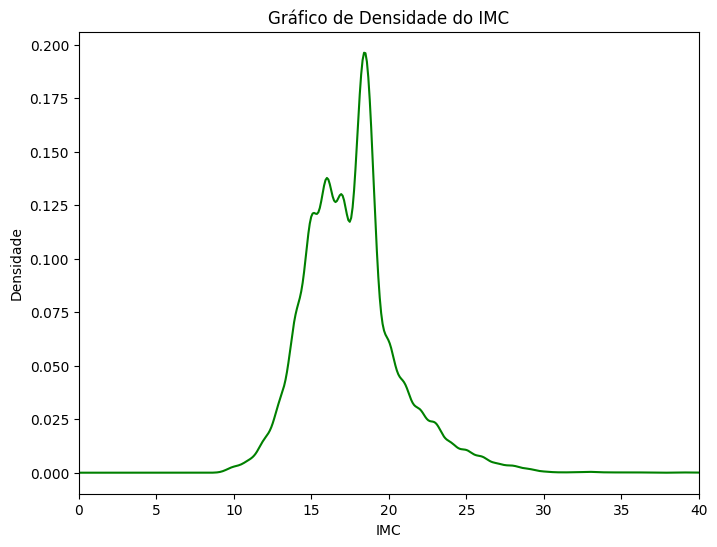

In [864]:
plt.figure(figsize=(8,6))
df['IMC'].plot(kind='kde', color='green')
plt.title('Gráfico de Densidade do IMC')
plt.xlabel('IMC')
plt.ylabel('Densidade')
plt.xlim(0,40)
plt.show()


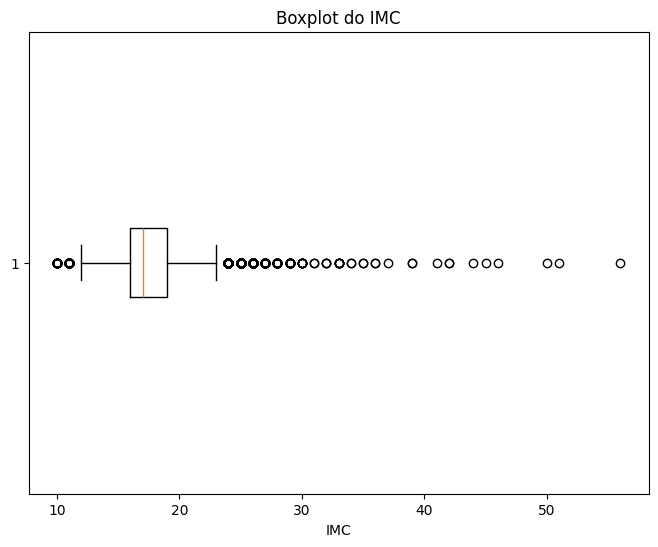

In [865]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(df['IMC'], vert=False)
plt.title('Boxplot do IMC')
plt.xlabel('IMC')
plt.show()


In [866]:
# Cálculo das estatísticas
moda_imc = df['IMC'].mode()
media_imc = df['IMC'].mean()
mediana_imc = df['IMC'].median()

print(f"O(s) valor(es) de IMC que mais se repete(m): {moda_imc.values}")
print(f"Média do IMC: {media_imc}")
print(f"Mediana do IMC: {mediana_imc}")


O(s) valor(es) de IMC que mais se repete(m): [16.]
Média do IMC: 17.605377184259126
Mediana do IMC: 17.0


# ALTURA/PESO/IMC - GRÁFICOS

- HISTOGRAMAS

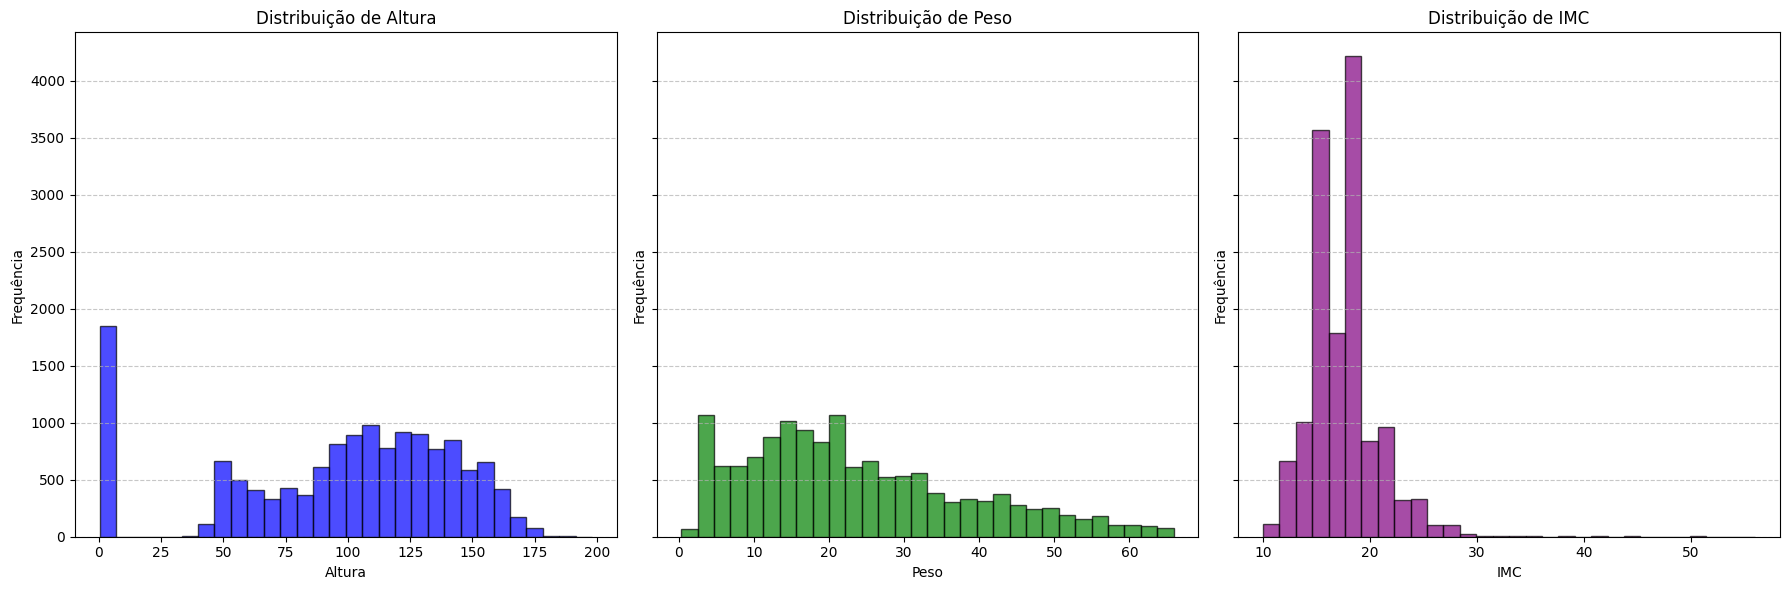

In [867]:
import matplotlib.pyplot as plt

# Criando histogramas para Altura, Peso e IMC
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Dados e configurações
variaveis = ['Altura', 'Peso', 'IMC']
titulos = ['Distribuição de Altura', 'Distribuição de Peso', 'Distribuição de IMC']
cores = ['blue', 'green', 'purple']

for i, var in enumerate(variaveis):
    axes[i].hist(df[var].dropna(), bins=30, color=cores[i], alpha=0.7, edgecolor='black')
    axes[i].set_title(titulos[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequência')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustando layout
plt.tight_layout()
plt.show()



- BOXPLOT

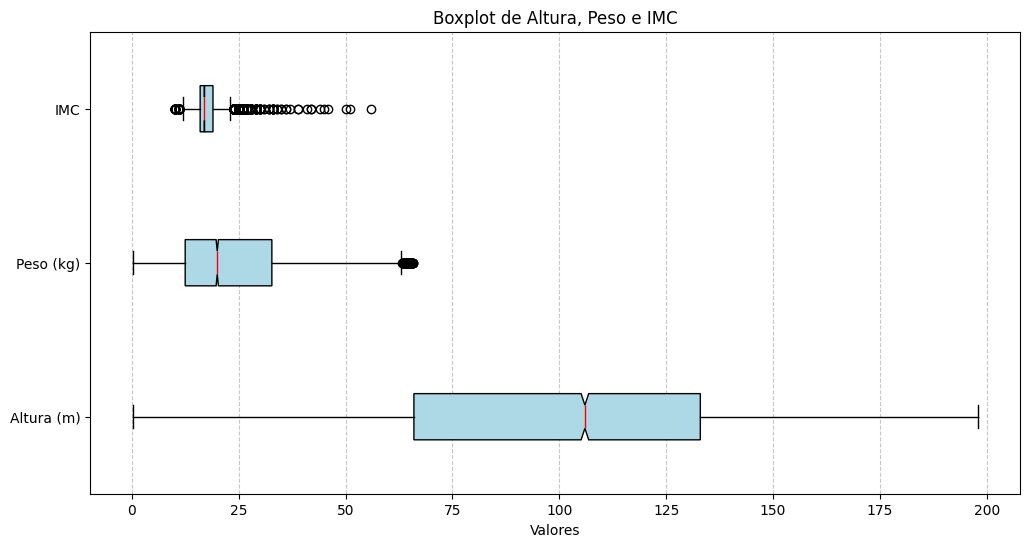

In [868]:
import matplotlib.pyplot as plt

# Criando um gráfico de boxplot para Altura, Peso e IMC
plt.figure(figsize=(12, 6))

# Dados a serem plotados
dados = [df['Altura'].dropna(), df['Peso'].dropna(), df['IMC'].dropna()]
labels = ['Altura (m)', 'Peso (kg)', 'IMC']

# Plotando o boxplot
plt.boxplot(dados, vert=False, patch_artist=True, notch=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red'), whiskerprops=dict(color='black'))

# Configurando o gráfico
plt.title('Boxplot de Altura, Peso e IMC')
plt.xlabel('Valores')
plt.yticks([1, 2, 3], labels)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()


# **HDA 1**

In [869]:
df['HDA 1'].unique()

array(['Palpitacao', 'Dispneia', 'Assintomático', nan, 'Dor precordial',
       'Desmaio/tontura', 'Outro', 'Cianose', 'Ganho de peso'],
      dtype=object)

In [870]:
# Imputação com a categoria "anon"
df['HDA 1'].fillna('outro', inplace=True)


<ipython-input-870-d71eca1946b1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HDA 1'].fillna('outro', inplace=True)


# **PA SISTOLICA / PA DIASTOLICA**
- 6361 registros excluídos - "não possuem simultaneamente as variáveis"

In [871]:
# Filtrar registros onde ambos PA SISTOLICA e PA DIASTOLICA estão ausentes
sem_pa = df[df['PA SISTOLICA'].isna() & df['PA DIASTOLICA'].isna()]

# Exibir os registros encontrados
print(f"Número de registros sem PA SISTOLICA e PA DIASTOLICA: {len(sem_pa)}")
print(sem_pa)

#removendo todos os registros onde as "PAs" são nulas
df = df[~(df['PA SISTOLICA'].isna() & df['PA DIASTOLICA'].isna())]


Número de registros sem PA SISTOLICA e PA DIASTOLICA: 5642
       Peso  Altura   IMC  IDADE   PULSOS  PA SISTOLICA  PA DIASTOLICA  \
0       5.0    51.0  19.0   0.12  Normais           NaN            NaN   
1       3.5    50.0  14.0   0.02  Normais           NaN            NaN   
3       8.1    65.0  19.0    0.5  Normais           NaN            NaN   
6      40.0   151.0  18.0  12.89  Normais           NaN            NaN   
8       8.0    61.0  21.0   0.26  Normais           NaN            NaN   
...     ...     ...   ...    ...      ...           ...            ...   
17860  12.3    89.0  16.0   2.13  Normais           NaN            NaN   
17864   5.4    57.0  17.0   0.13  Normais           NaN            NaN   
17866   9.5    75.0  17.0   1.11  Normais           NaN            NaN   
17868   9.5    76.0  16.0    1.2  Normais           NaN            NaN   
17869  12.0    75.0  21.0   0.81  Normais           NaN            NaN   

                 PPA NORMAL X ANORMAL      B2      S

In [872]:
faltantes_pas = df['PA SISTOLICA'].isna().sum()
faltantes_pad = df['PA DIASTOLICA'].isna().sum()

print(f"Faltantes em PAS: {faltantes_pas} ({(faltantes_pas / len(df)) * 100:.2f}%)")
print(f"Faltantes em PAD: {faltantes_pad} ({(faltantes_pad / len(df)) * 100:.2f}%)")


Faltantes em PAS: 1 (0.01%)
Faltantes em PAD: 6 (0.07%)


# **SEXO**

- Agrupando as categorias

In [873]:
# Contar as ocorrências de cada categoria na coluna SEXO
ocorrencias_sexo = df['SEXO'].value_counts()

# Exibir as ocorrências
print(ocorrencias_sexo)


SEXO
M                4520
F                3337
Masculino         328
Feminino          115
Indeterminado      93
masculino          42
Name: count, dtype: int64


In [874]:
# Mapear os valores existentes para as 3 categorias desejadas
df['SEXO'] = df['SEXO'].replace({
    'Masculino': 'M',
    'masculino': 'M',
    'Feminino': 'F',
    'M': 'M',
    'F': 'F',
    'Indeterminado': 'Indeterminado'
})

# Verificar as ocorrências após o mapeamento
print(df['SEXO'].value_counts())


SEXO
M                4890
F                3452
Indeterminado      93
Name: count, dtype: int64


<ipython-input-874-9fcfcef485db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEXO'] = df['SEXO'].replace({


- Inputando 50% Masculino / 50% feminino para os registros nulos em 'Sexo'

In [875]:
nulos_sexo = df['SEXO'].isna().sum()

n_masculino = nulos_sexo // 2
n_feminino = nulos_sexo - n_masculino

# Índices dos registros nulos
indices_nulos = df[df['SEXO'].isna()].index

# Imputar 50% como masculino e 50% como feminino
df.loc[indices_nulos[:n_masculino], 'SEXO'] = 'M'
df.loc[indices_nulos[n_masculino:], 'SEXO'] = 'F'


# **Idade**


In [876]:
# Convert the 'IDADE' column to numeric, handling errors by coercing invalid values to NaN
df['IDADE'] = pd.to_numeric(df['IDADE'], errors='coerce')

# Replace negative ages and NaN values with the calculated average
df['IDADE'] = df['IDADE'].apply(lambda x: np.nan if x < 0 else x)

# Verificar se ainda há idades negativas ou NaN
idades_negativas = df[df['IDADE'] < 0]
print(idades_negativas)


Empty DataFrame
Columns: [Peso, Altura, IMC, IDADE, PULSOS, PA SISTOLICA, PA DIASTOLICA, PPA, NORMAL X ANORMAL, B2, SOPRO, FC, HDA 1, SEXO, MOTIVO1, MOTIVO2]
Index: []


<ipython-input-876-9cbe3f272ac7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IDADE'] = pd.to_numeric(df['IDADE'], errors='coerce')
<ipython-input-876-9cbe3f272ac7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IDADE'] = df['IDADE'].apply(lambda x: np.nan if x < 0 else x)


- Removendo registros com idade == 0 e outliers

In [877]:
# Remover outliers da coluna 'Idade'

Q1 = df['IDADE'].quantile(0.25)
Q3 = df['IDADE'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['IDADE'] >= limite_inferior) & (df['IDADE'] <= limite_superior)]


In [878]:
df = df[df['IDADE'] != 0]


- Inputando os dados com base na média das idades

In [879]:
idades = df[df['IDADE'] > 0]
print(len(idades))

idades.head(5)


8083


,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1,MOTIVO2
4,39.5,142.000000,20.0,9.60,Normais,85.0,50.0,Normal,Anormal,Normal,ausente,90,outro,M,5 - Parecer cardiológico,5 - Atividade física
5,26.0,112.000000,21.0,4.40,Normais,100.0,60.0,Normal,Anormal,Desdob fixo,ausente,100,Assintomático,M,2 - Check-up,NaN
7,28.0,117.000000,20.0,5.89,Normais,110.0,65.0,Pre-Hipertensão PAS,Anormal,Normal,ausente,80,Assintomático,F,5 - Parecer cardiológico,5 - Cirurgia
10,24.5,122.000000,16.0,6.24,Normais,100.0,65.0,Normal,Anormal,Normal,sistólico,88,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia
12,42.0,1.506742,18.5,15.50,Normais,100.0,60.0,Não Calculado,Normal,Normal,ausente,52,Assintomático,M,2 - Check-up,NaN


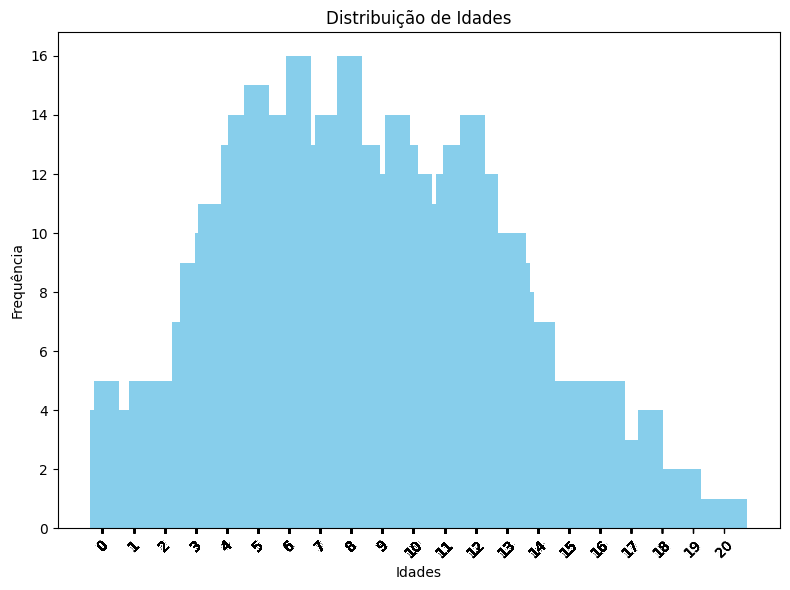

In [880]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'IDADE' é uma coluna de um DataFrame chamado df
data = df.copy()  # Fazendo uma cópia do DataFrame para evitar alterações no original
data['IDADE'] = pd.to_numeric(data['IDADE'], errors='coerce')  # Convertendo para numérico

# Calculando a frequência das idades
freq = data['IDADE'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(freq.index, freq.values, color='skyblue')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')
plt.xticks(freq.index.astype(int), rotation=45)  # Garantindo rótulos legíveis no eixo x
plt.tight_layout()  # Ajustando para evitar sobreposição
plt.show()



- Inferir valores para idades nulas a partir da normal

In [881]:
import numpy as np
import pandas as pd

def preencher_faltantes_distribuicao_normal(df, coluna):

    # Calcular média e desvio padrão ignorando valores faltantes
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()

    # Gerar valores normalmente distribuídos para os NaNs
    faltantes = df[coluna].isnull().sum()
    valores_gerados = np.random.normal(loc=media, scale=desvio_padrao, size=faltantes)

    # Substituir valores faltantes
    df.loc[df[coluna].isnull(), coluna] = valores_gerados
    return df

df = preencher_faltantes_distribuicao_normal(df, 'IDADE')



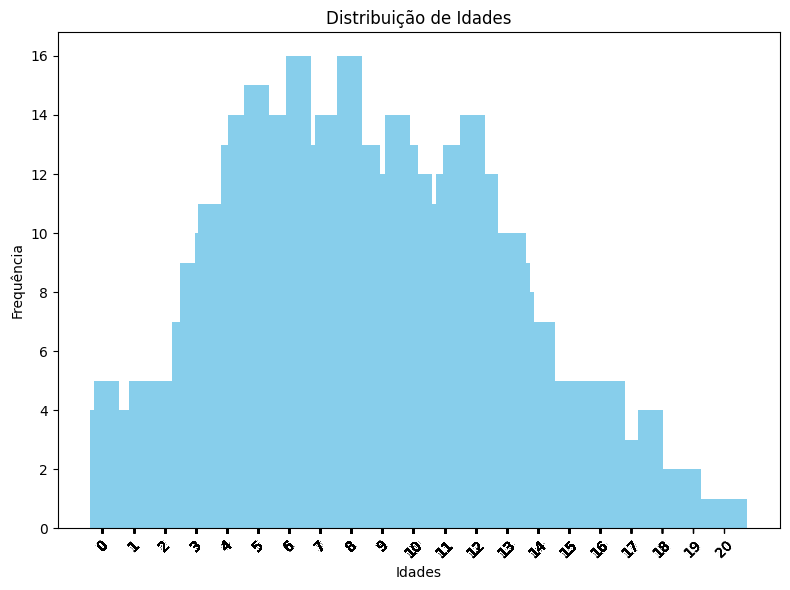

In [882]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'IDADE' é uma coluna de um DataFrame chamado df
data = df.copy()  # Fazendo uma cópia do DataFrame para evitar alterações no original
data['IDADE'] = pd.to_numeric(data['IDADE'], errors='coerce')  # Convertendo para numérico

# Calculando a frequência das idades
freq = data['IDADE'].value_counts().sort_index()

# Gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(freq.index, freq.values, color='skyblue')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')
plt.xticks(freq.index.astype(int), rotation=45)  # Garantindo rótulos legíveis no eixo x
plt.tight_layout()  # Ajustando para evitar sobreposição
plt.show()



# **MOTIVO 1**

In [883]:
df['MOTIVO1'].unique()

array(['5 - Parecer cardiológico', '2 - Check-up',
       '6 - Suspeita de cardiopatia', nan,
       '1 - Cardiopatia já estabelecida', '7 - Outro'], dtype=object)

In [884]:
# Imputação com a categoria "anon"
df['MOTIVO1'].fillna('Outro', inplace=True)


<ipython-input-884-1f7ad7e5a98e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MOTIVO1'].fillna('Outro', inplace=True)


# MOTIVO 2

In [885]:
df['MOTIVO2'].unique()

array(['5 - Atividade física', nan, '5 - Cirurgia',
       '6 - Palpitação/taquicardia/arritmia', '6 - Dor precordial',
       '6 - HAS/dislipidemia/obesidade', '6 - Sopro', 'Outro',
       '1 - Cardiopatia congenica', '6 - Alterações de pulso/perfusão',
       '6 - Dispnéia', '6 - Cansaço', '1 - Cardiopatia adquirida',
       '6 - Cardiopatia na familia', '6 - Cianose',
       '6 - Cianose e dispnéia', '5 - Uso de cisaprida'], dtype=object)

In [886]:
# Imputação com a categoria "anon"
df['MOTIVO1'].fillna('Outro', inplace=True)


# PPA

- Para inferir as PPAs (Pressão arterial Pedriatrica Ajustada) utilizaremos a tabela de pressões arteriais em crianças e adolescentes disponível em:
- https://www.nhlbi.nih.gov/sites/default/files/media/docs/hbp_ped.pdf

In [887]:
valppa = df['PPA'].unique()
valpas = df['PA SISTOLICA'].unique()
valpad = df['PA DIASTOLICA'].unique()
print(f"Valores distintos em PPA: {valppa}")
print(f"Valores distintos em PAS: {valpas}")
print(f"Valores distintos em PAD: {valpad}")

Valores distintos em PPA: ['Normal' 'Pre-Hipertensão PAS' 'Não Calculado' 'HAS-2 PAS'
 'Pre-Hipertensão PAD' nan 'HAS-1 PAS' 'HAS-2 PAD' 'HAS-1 PAD']
Valores distintos em PAS: [ 85. 100. 110.  90. 140. 105.  95. 120. 115.  80. 150. 130.  82. 145.
  96. 108.  88.  98.  70. 190. 170. 111. 118. 125. 135. 112.  10. 160.
  92. 103.  nan 106. 124.  60.  87. 102.  75. 123. 114.  78.  86. 700.]
Valores distintos em PAD: [ 50.  60.  65.  90.  70. 100.  80.  55.  45.  58.  40.  75.  68.  72.
  85.  62.  76.  78.  nan  35.  67.   6.  73.  52. 110.  54.  56.  63.
  64.  95. 115.  77.  23.   7.  57.  66.]


In [888]:
imc_mean_values = df.groupby('IDADE')['IMC'].mean()

# Se você quiser converter para um dicionário ou lista
imc_mean_values_dict = imc_mean_values.to_dict()

# Exibir os resultados
print(imc_mean_values)

IDADE
0.01     16.125000
0.02     19.500000
0.03     14.833333
0.04     18.500000
0.05     17.000000
           ...    
19.81    21.000000
20.05    17.000000
20.13    20.000000
20.25    18.000000
20.33    19.000000
Name: IMC, Length: 1621, dtype: float64


In [889]:
faixas_pa = {
    1: {'Normal': (80, 89, 34, 39), 'Pre Hipertensao': (94, 103, 49, 53), 'Hipertensao 1': (100, 106, 54, 58), 'Hipertensao 2': (106, 114, 61, 66)},
    2: {'Normal': (84, 92, 39, 44), 'Pre Hipertensao': (95, 106, 54, 58), 'Hipertensao 1': (101, 110, 59, 63), 'Hipertensao 2': (110, 117, 66, 71)},
    3: {'Normal': (86, 95, 44, 48), 'Pre Hipertensao': (100, 109, 59, 63), 'Hipertensao 1': (104, 113, 63, 67), 'Hipertensao 2': (111, 120, 71, 75)},
    4: {'Normal': (88, 97, 47, 51), 'Pre Hipertensao': (102, 111, 62, 66), 'Hipertensao 1': (106, 115, 66, 71), 'Hipertensao 2': (113, 122, 74, 78)},
    5: {'Normal': (90, 98, 50, 55), 'Pre Hipertensao': (104, 112, 65, 69), 'Hipertensao 1': (108, 116, 69, 74), 'Hipertensao 2': (115, 123, 77, 81)},
    6: {'Normal': (91, 100, 53, 57), 'Pre Hipertensao': (105, 113, 68, 72), 'Hipertensao 1': (109, 117, 72, 76), 'Hipertensao 2': (116, 125, 80, 84)},
    7: {'Normal': (92, 101, 55,59), 'Pre Hipertensao': (106 ,115 ,70 ,74), 'Hipertensao1' : (110 ,119 ,74 ,78) , 'Hipertensao2' : (117 ,126 ,82 ,86)},
    8: {'Normal': (94 ,102 ,56 ,61) , 'Pre Hipertensao' : (107 ,116 ,71 ,76) , 'Hipertensao1' : (111 ,120 ,75 ,80) , 'Hipertensao2' : (119 ,127 ,83 ,88)},
    9: {'Normal' : (95 ,104 ,57 ,62) ,'Pre Hipertensao' : (109 ,118 ,72 ,77) ,'Hipertensao1' : (113 ,121 ,76 ,81) ,'Hipertensao2' : (120 ,129 ,84 ,89)},
    10: {'Normal' : (97 ,106 ,58 ,63) ,'Pre Hipertensao' : (111 ,119 ,73 ,78) ,'Hipertensao1' : (115 ,123 ,77 ,82) ,'Hipertensao2' : (122 ,130 ,85 ,90)},
    11: {'Normal' : (99 ,107 ,59 ,63) ,'Pre Hipertensao' : (113 ,121 ,74 ,78) ,'Hipertensao1' : (117 ,125 ,78 ,82) ,'Hipertensao2' : (124 ,132 ,86 ,90)},
    12: {'Normal' : (101 ,110 ,59 ,64) ,'Pre Hipertensao' : (115 ,123 ,74 ,79) ,'Hipertensao1' : (119 ,127 ,78 ,83) ,'Hipertensao2' : (126 ,135 ,86 ,91)},
    13: {'Normal' : (104 ,112,60 ,64) ,'Pre Hipertensao' : (117,126,75,79) ,'Hipertensao1' : (121,130,79,83) ,'Hipertensao2' : (128,137,87,91)},
    14: {'Normal' : (106,115,60,65) ,'Pre Hipertensao' : (120,128,75,80) ,'Hipertensao1' : (124,132,80,84) ,'Hipertensao2' : (131,140,87,92)},
    15: {'Normal' : (109,117,61,66) ,'Pre Hipertensao' : (122,131,76,81) ,'Hipertensao1' : (126,135,81,85) ,'Hipertensao2' : (134,142,88,93)},
    16: {'Normal' : (111,120,63,67) ,'Pre Hipertensao' : (125,134,78,82) ,'Hipertensao1' : (129,137,82,87) ,'Hipertensao2' : (136,145,90,94)},
    17: {'Normal' : (114,122,65,70) ,'Pre Hipertensao' : (127,136,80,84) ,'Hipertensao1' : (131,140,84,89) ,'Hipertensao2' : (139,147,92,97)}
}

In [890]:
idades_zero = df[df['IDADE'] == 0]
print(idades_zero)

Empty DataFrame
Columns: [Peso, Altura, IMC, IDADE, PULSOS, PA SISTOLICA, PA DIASTOLICA, PPA, NORMAL X ANORMAL, B2, SOPRO, FC, HDA 1, SEXO, MOTIVO1, MOTIVO2]
Index: []


In [891]:
# Função para categorizar PPA com base em PAS, PAD e idade
df2 = df.copy()
df2['IDADE'] = pd.to_numeric(df2['IDADE' ])

def categorizar_ppa(row, faixas_pa):
    idade = row['IDADE']
    pas = row['PA SISTOLICA']
    pad = row['PA DIASTOLICA']
    imc = row['IMC']


    # Verificar se os dados são válidos
    if pd.isna(pas) or pd.isna(pad):
        return "Não Calculado"

    # Verificar se a idade está no dicionário
    if idade not in faixas_pa:
        return "Não Calculado"

    # Obter as faixas para a idade
    faixas = faixas_pa[idade]

    # Avaliar as condições de categorização
    for categoria, (pas_min, pas_max, pad_min, pad_max) in faixas.items():
        if pas_min <= pas <= pas_max and pad_min <= pad <= pad_max:
            return categoria

    # Caso não se encaixe em nenhuma categoria
    return "Não categorizado"

    if len(categories) == 0:
        return 'Não calculado'
    elif len(categories) == 1:
        return categories[0]
    else:
        # Comparar IMC com a média para decidir a categoria final
        imc_mean = imc_mean_values.get(age, None)
        if imc_mean is None:
            return 'Não calculado' # Caso não tenha média para a idade
        if imc > imc_mean + 2: # Ajuste o valor conforme necessário
            return categories[-1] # Categoria mais severa
        else:
            return categories[0] # Categoria menos severa

# Aplicar a função para calcular a categoria de PPA
df2['PPA'] = df2.apply(lambda row: categorizar_ppa(row, faixas_pa) if pd.isna(row['PPA']) else row['PPA'], axis=1)

# Exibir os resultados
print(df2[['IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'PPA']].head())

    IDADE  PA SISTOLICA  PA DIASTOLICA                  PPA
4    9.60          85.0           50.0               Normal
5    4.40         100.0           60.0               Normal
7    5.89         110.0           65.0  Pre-Hipertensão PAS
10   6.24         100.0           65.0               Normal
12  15.50         100.0           60.0        Não Calculado


In [892]:
import pandas as pd

df['PPA'] = df['PPA'].replace('Não calculado', np.nan)


# Carregar os dados da pressão arterial
file_path = 'Blood_Pressure_Levels.ods'
blood_pressure_data = pd.read_excel(file_path, engine='odf')

# Supondo que você tenha um dicionário com IMCs médios por idade
imc_mean_values = {
    1: 16.5, 2: 17.0, 3: 17.5, 4: 18.0, 5: 18.5,
    6: 19.0, 7: 19.5, 8: 20.0, 9: 20.5, 10: 21.0,
    # Adicione os valores médios de IMC para as idades restantes
}

def categorize_ppa(row):
    age = row['IDADE']
    pas = row['PA SISTOLICA']
    pad = row['PA DIASTOLICA']
    imc = row['IMC']

    if pd.isnull(pas) or pd.isnull(pad):
        return 'Não calculado'

    relevant_data = blood_pressure_data[blood_pressure_data['Age (Years)'] == age]
    categories = []

    for index, row in relevant_data.iterrows():
        if row['PAS MINIMO'] <= pas <= row['PAS MAXIMO'] and row['PAD MINIMO'] <= pad <= row['PAD MAXIMO']:
            categories.append(row['Tipo'])

    if len(categories) == 0:
        return 'Não calculado'
    elif len(categories) == 1:
        return categories[0]
    else:
        # Comparar IMC com a média para decidir a categoria final
        imc_mean = imc_mean_values.get(age, None)
        if imc_mean is None:
            return 'Não calculado' # Caso não tenha média para a idade
        if imc > imc_mean + 2: # Ajuste o valor conforme necessário
            return categories[-1] # Categoria mais severa
        else:
            return categories[0] # Categoria menos severa

# Supondo que seu DataFrame original se chama df
df['PPA'] = df.apply(categorize_ppa, axis=1)



In [893]:
PPA_nulos = df[df['PPA'].isna()]

# Exibir os registros com target nulo
print(f"Número de registros com target nulo: {len(PPA_nulos)}")
print(PPA_nulos.head(15))

Número de registros com target nulo: 0
Empty DataFrame
Columns: [Peso, Altura, IMC, IDADE, PULSOS, PA SISTOLICA, PA DIASTOLICA, PPA, NORMAL X ANORMAL, B2, SOPRO, FC, HDA 1, SEXO, MOTIVO1, MOTIVO2]
Index: []


In [894]:
df.dropna(subset=['PA SISTOLICA', 'PA DIASTOLICA'], inplace=True)

# FC

In [895]:
df['FC'].unique()

array(['90', '100', '80', '88', '52', '95', '70', '78', '84', '120', '76',
       nan, '92', '68', '96', '86', '60', '82', '72', '75', '110', '64',
       '85', '116', '124', '104', '128', '156', '140', '150', '10', '130',
       '115', '55', '74', '112', '780', '50', '94', '62', '98', '102',
       '65', '8096', '972', '56', '108', '106', '114', '66', '900', '89',
       '57', '50-100', '87', '83', '16', '135', '118', '79', '148', '48',
       '107', '136', '97', '99', '180', '123', '109', '160', '192', '129',
       '9288', '105', '132', '73'], dtype=object)

- Transformando a Coluna 'FC', excluindo valores irreais e substituindo ranges pelas suas médias

In [896]:
def processar_fc(valor):
    # Verifica se o valor é NaN
    try:
        num = int(valor)
        if num > 200 or num <  50:# Excluindo valores irreais, como 1120 ou 1560
            return np.nan
        return num
    except ValueError:
        return np.nan


    if pd.isna(valor):
        return np.nan

    # Verifica se o valor é um intervalo (ex: "140-200")
    if isinstance(valor, str) and '-' in valor:
        partes = valor.split('-')
        try:
            media = (int(partes[0]) + int(partes[1])) / 2
            return int(media)
        except ValueError:
            return np.nan  # Se não for possível converter, retorna NaN

    # Verifica se o valor é um número e se é realista
 # Se não for possível converter, retorna NaN

# Aplicar a função na coluna FC
df['FC'] = df['FC'].apply(processar_fc)

- Transformando a Coluna 'FC' pt. 2

In [897]:
# Filtrar os dados não faltantes
fc_validos = df['FC'].dropna()

# Aplicar a transformação logarítmica
fc_log = np.log(fc_validos)

-  Calcular Média e Desvio Padrão


In [898]:
mu = fc_log.mean()
sigma = fc_log.std()

- Gerar Valores Faltantes

In [899]:
# Identificar os índices dos dados faltantes
indices_faltantes = df['FC'].index[df['FC'].isnull()]

# Gerar valores imputados usando a distribuição log-normal
valores_imputados = np.random.lognormal(mean=mu, sigma=sigma, size=len(indices_faltantes))

- Preencher os Dados Faltantes

In [900]:
# Imputar os valores gerados nos dados faltantes
df.loc[indices_faltantes, 'FC'] = valores_imputados

- Verificação da Distribuição

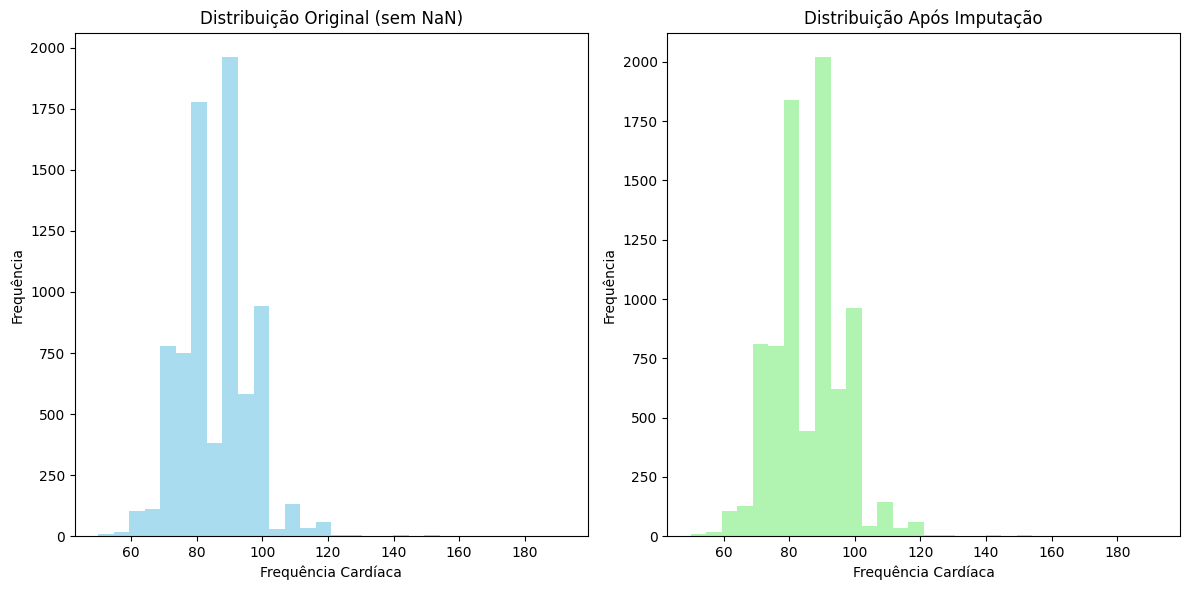

In [901]:
import matplotlib.pyplot as plt

# Visualizar a distribuição antes e depois da imputação
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(fc_validos, bins=30, alpha=0.7, color='skyblue')
plt.title('Distribuição Original (sem NaN)')
plt.xlabel('Frequência Cardíaca')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(df['FC'], bins=30, alpha=0.7, color='lightgreen')
plt.title('Distribuição Após Imputação')
plt.xlabel('Frequência Cardíaca')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [902]:
valores_faltantes_por_coluna = df['FC'].isna().sum()
#valores_faltantes_por_coluna
print(f"Valores faltantes: {df['FC'].isna().sum()}")

Valores faltantes: 0


# PULSOS

In [903]:
df['PULSOS'].unique()

array(['Normais', nan, 'Outro', 'Femorais diminuidos', 'Amplos',
       'Diminuídos '], dtype=object)

In [904]:
df['PULSOS'] = df['PULSOS'].apply(lambda x: 'Outro' if pd.isna(x) else x)

# B2

In [905]:
df['B2'].unique()

array(['Normal', 'Desdob fixo', 'Outro', 'Hiperfonética', 'Única', nan],
      dtype=object)

In [906]:
faltantesB2 = df['B2'].isna().sum()
print(f"Faltantes em B2: {faltantesB2} ({(faltantesB2 / len(df)) * 100:.2f}%)")

Faltantes em B2: 2 (0.02%)


In [907]:
df['B2'] = df['B2'].apply(lambda x: 'Outro' if pd.isna(x) else x)

# Gráficos Para Analisar as variáveis

<Axes: >

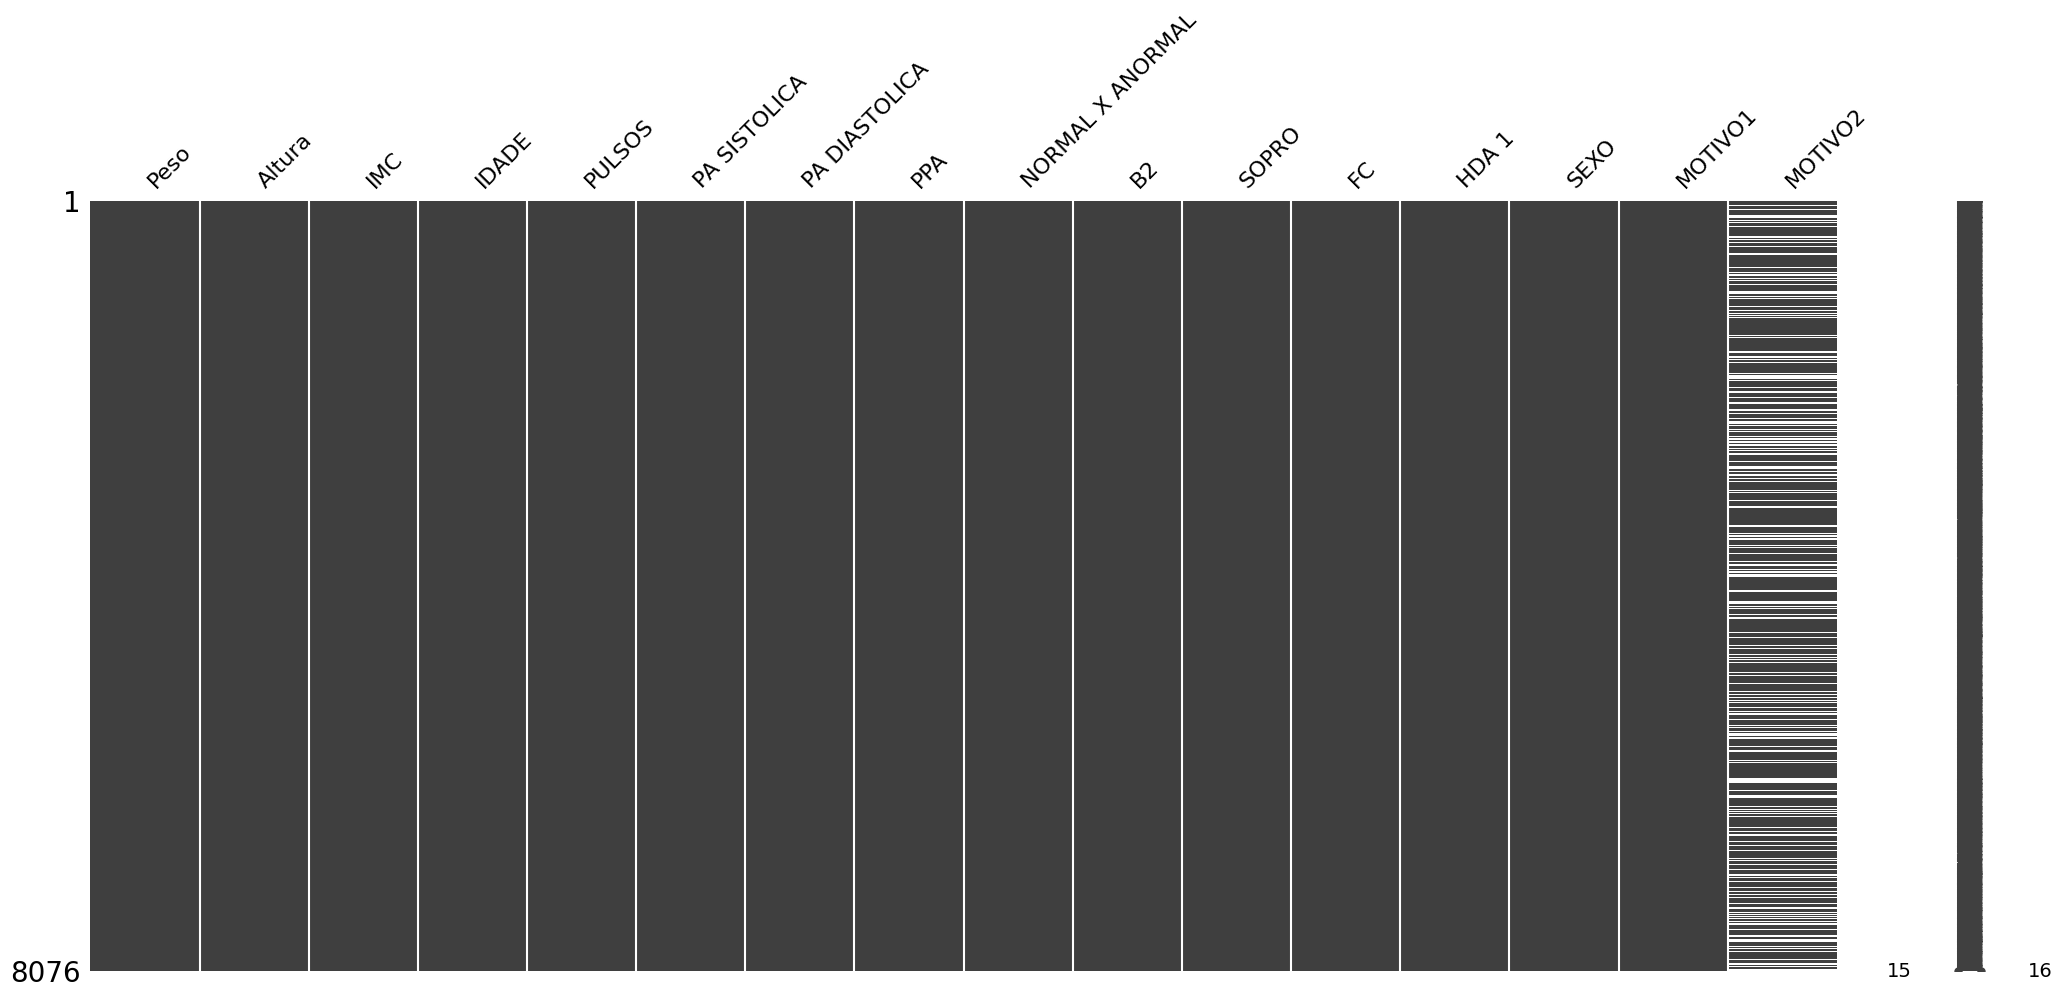

In [908]:
import missingno as msno
msno.matrix(df)

- Variáveis essencialmente Numéricas

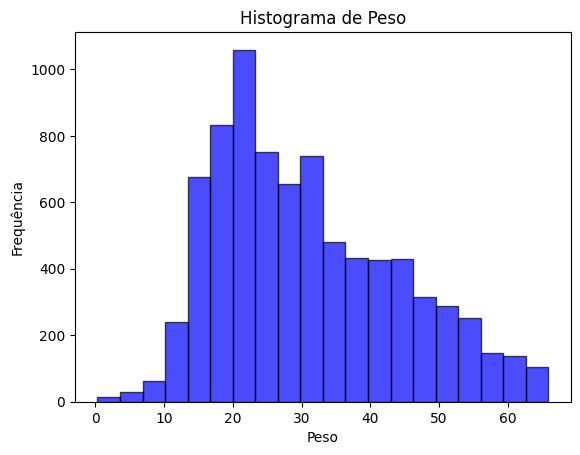

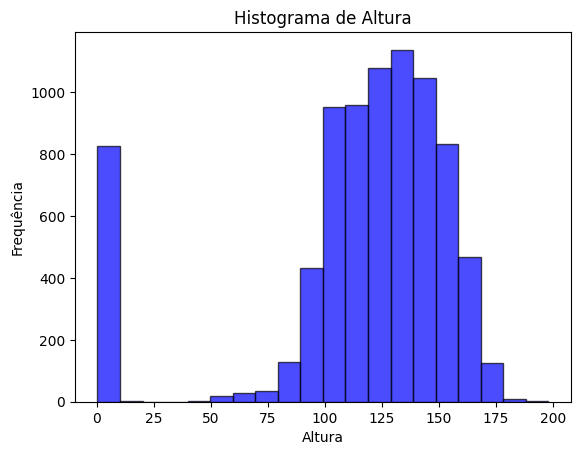

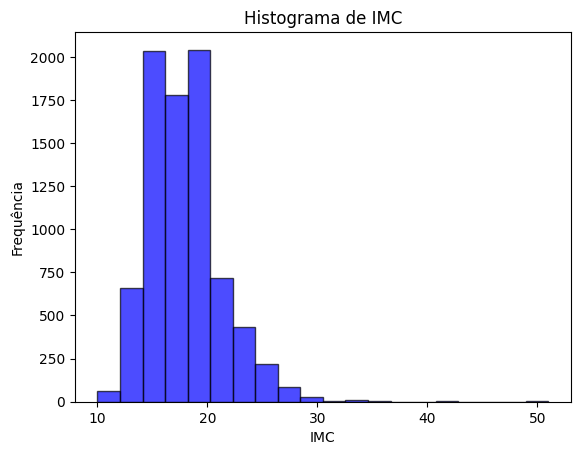

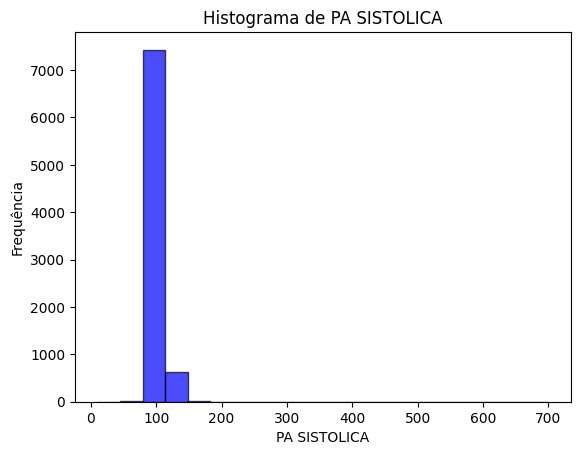

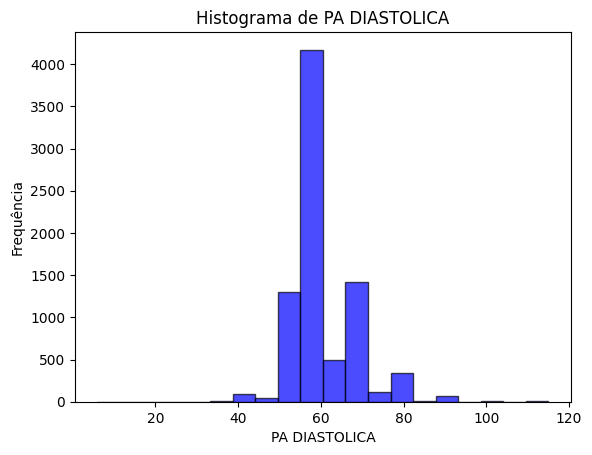

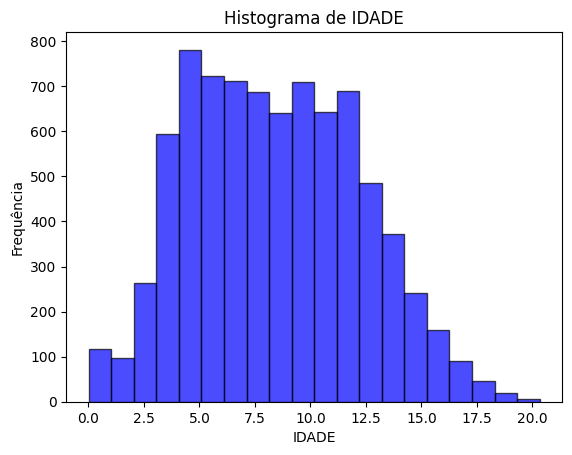

In [909]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotar histograma para todas as variáveis numéricas
variaveis_numericas = ['Peso', 'Altura', 'IMC', 'PA SISTOLICA', 'PA DIASTOLICA', 'IDADE']

for col in variaveis_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

    plt.hist(df[col], bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

- Boxplot -> variáveis numéricas

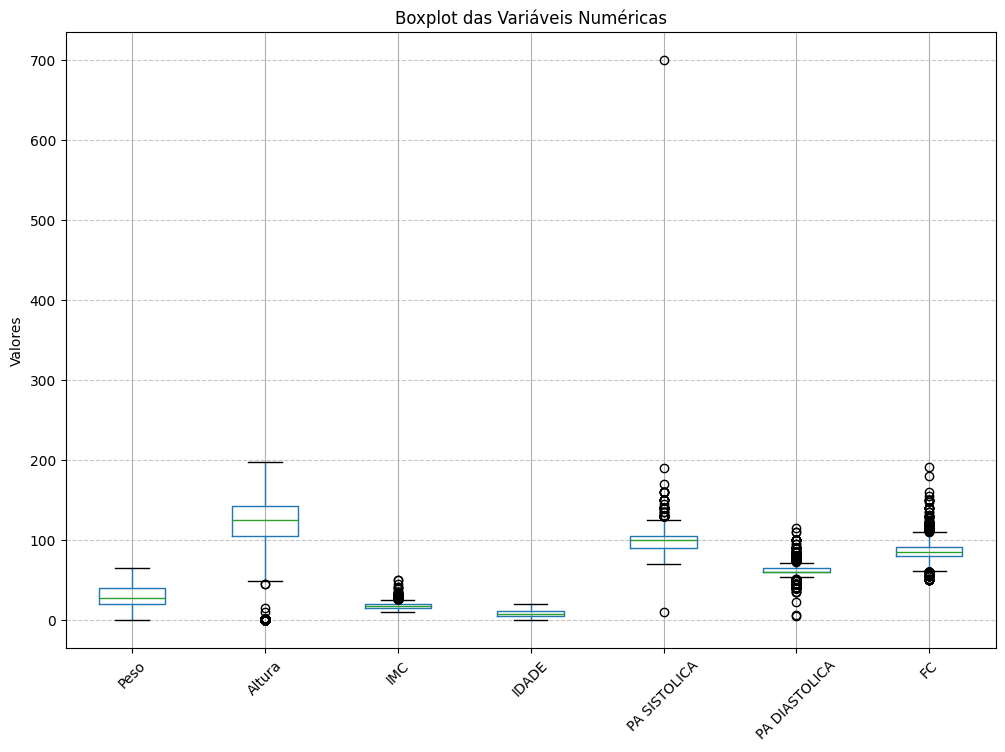

In [910]:
import matplotlib.pyplot as plt

# Selecionar apenas as variáveis numéricas
numerical_columns = df.select_dtypes(include=['number']).columns

# Criar um gráfico de boxplot para as variáveis numéricas
plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Boxplot das Variáveis Numéricas')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- Variáveis essencialmente categóricas

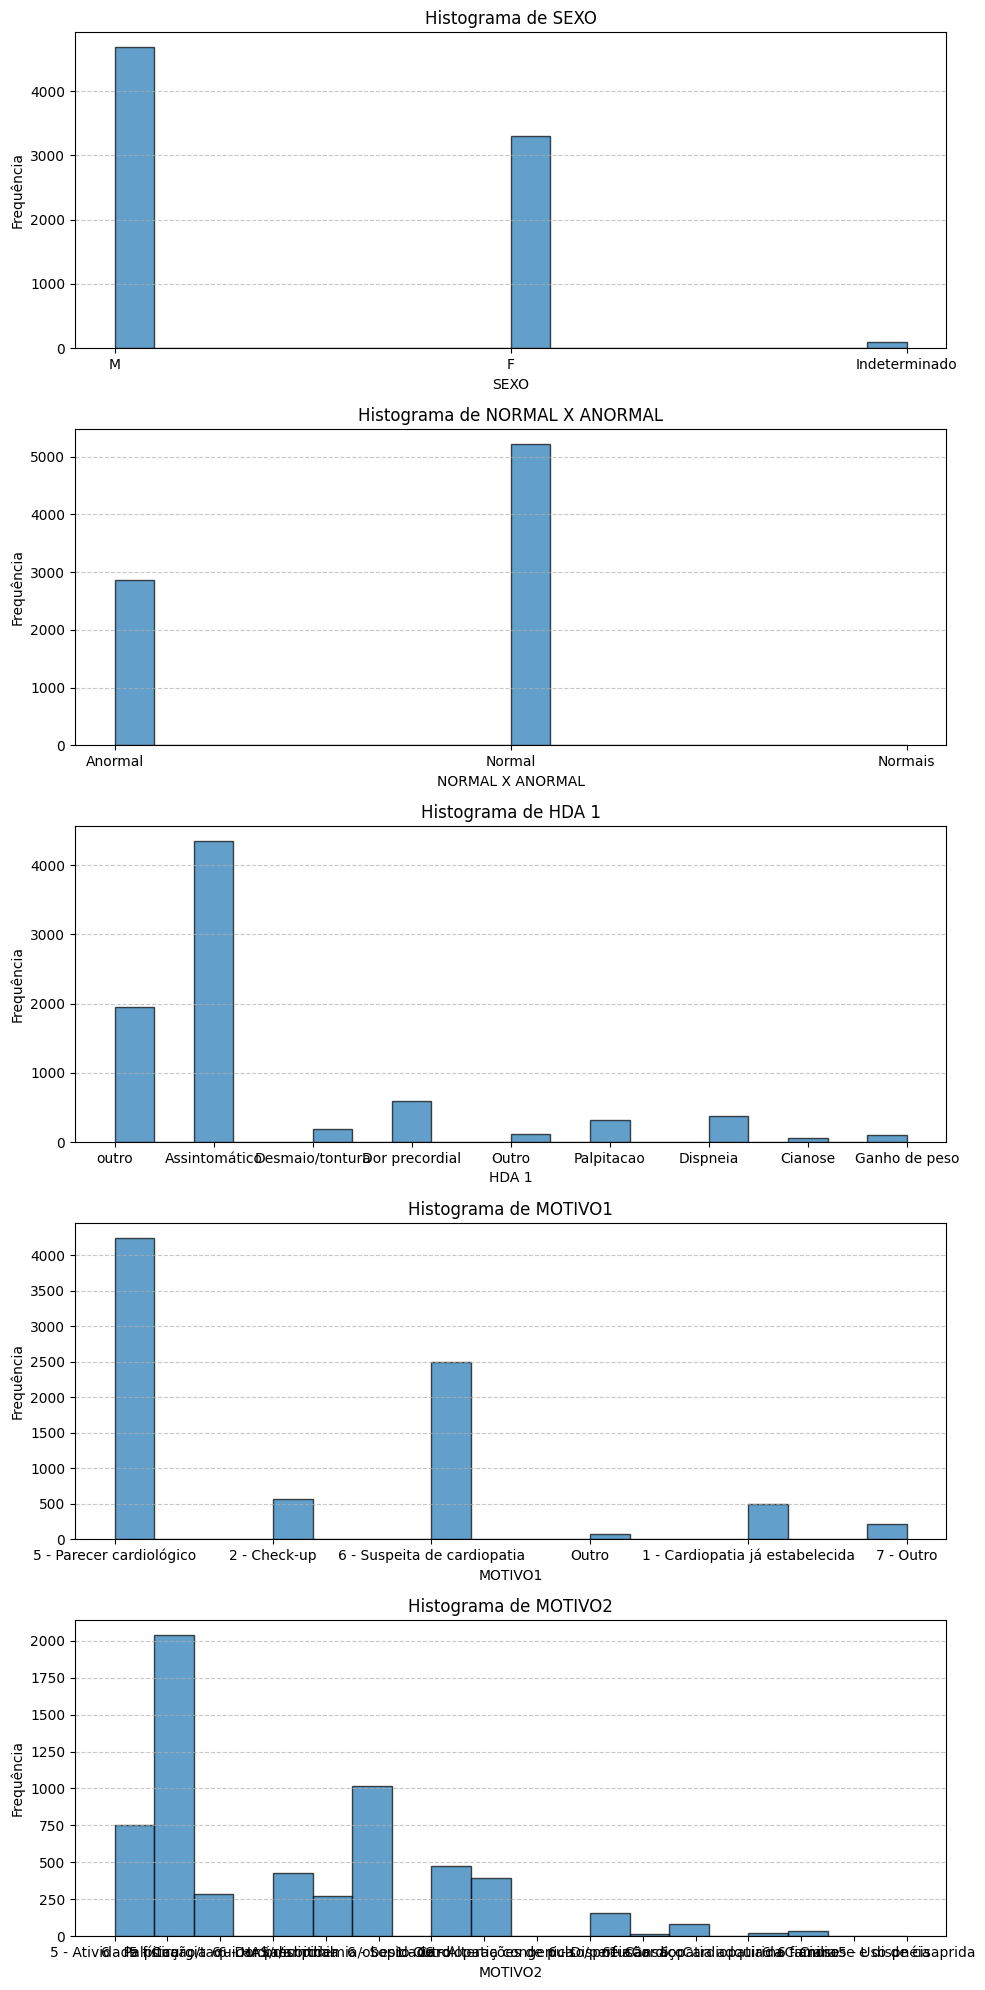

In [911]:
import matplotlib.pyplot as plt

# Substitua pelos nomes originais das variáveis categóricas
categorical_columns = ['SEXO', 'NORMAL X ANORMAL', 'HDA 1', 'HDA2', 'MOTIVO1', 'MOTIVO2']

# Selecionar apenas as colunas que estão no DataFrame
numerical_columns = [col for col in categorical_columns if col in df.columns]

# Criar os histogramas
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, len(numerical_columns) * 4))

for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [912]:
alturas_zero = df[df['Altura'] == 0]
alturas_entre_0_e_2 = df[(df['Altura'] > 0) & (df['Altura'] <= 2)]

print(f"Alturas == 0: {len(alturas_zero)}")
print(f"Alturas entre 0 e 2: {len(alturas_entre_0_e_2)}")

Alturas == 0: 0
Alturas entre 0 e 2: 825


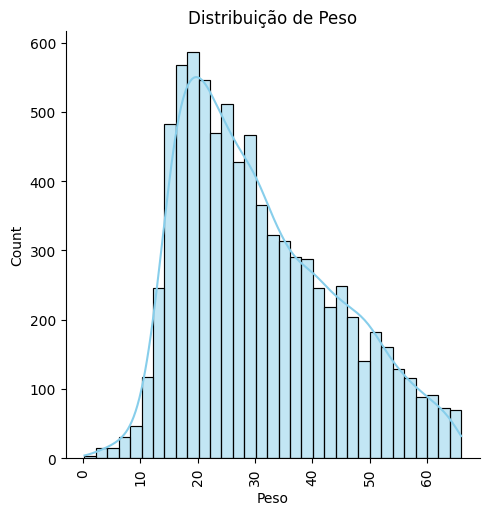

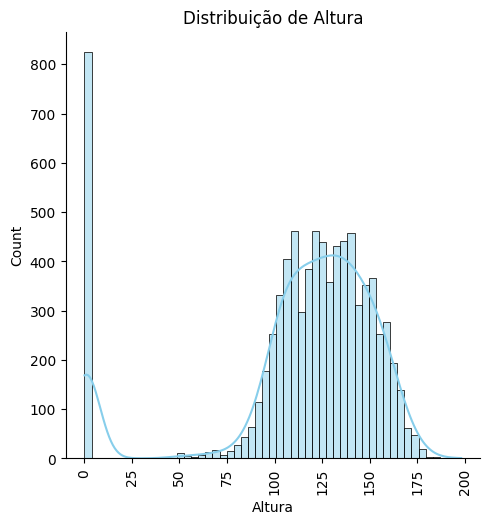

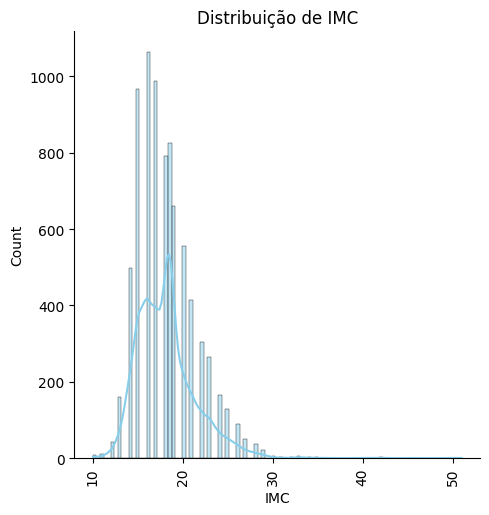

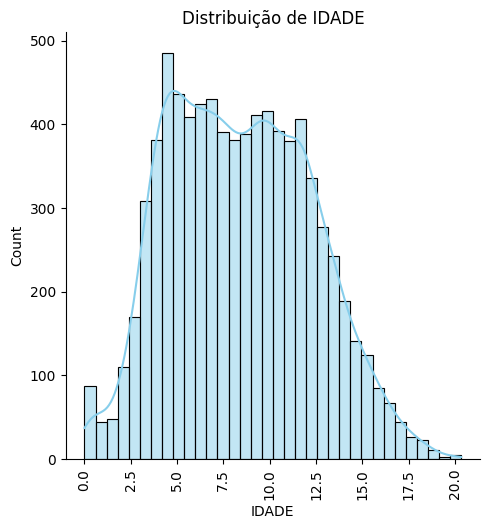

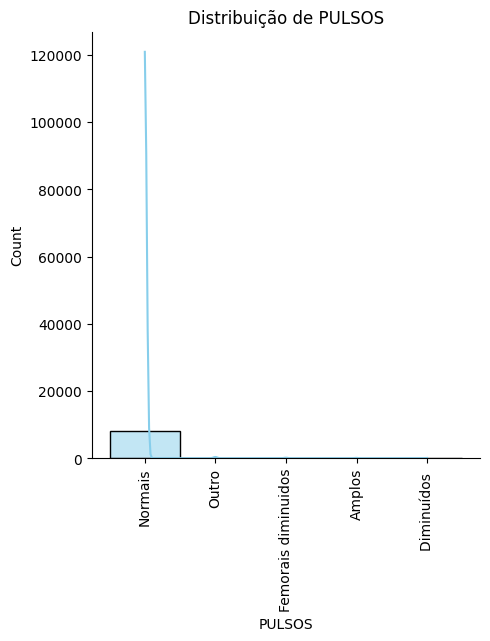

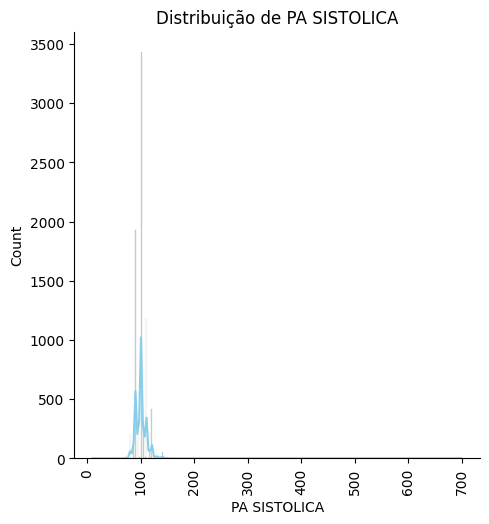

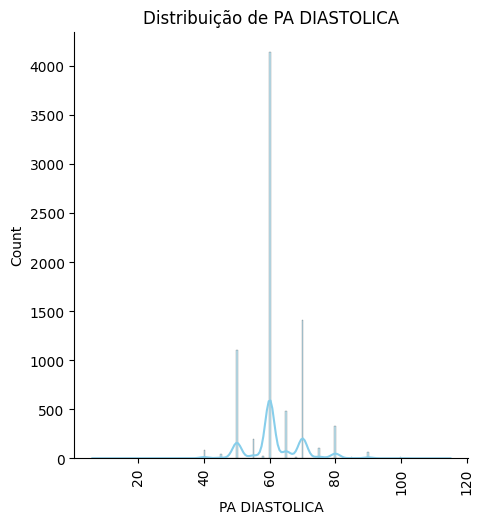

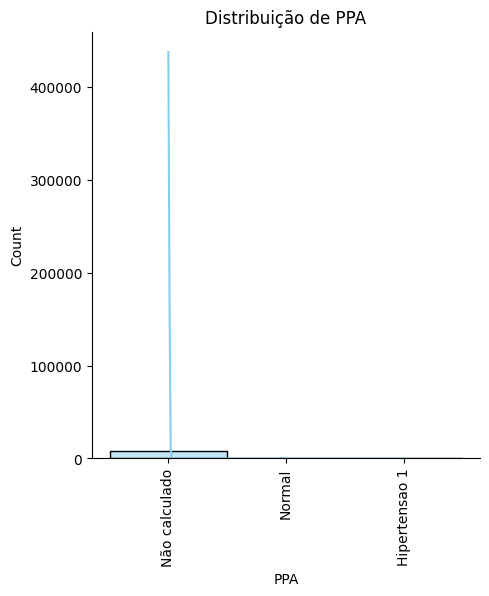

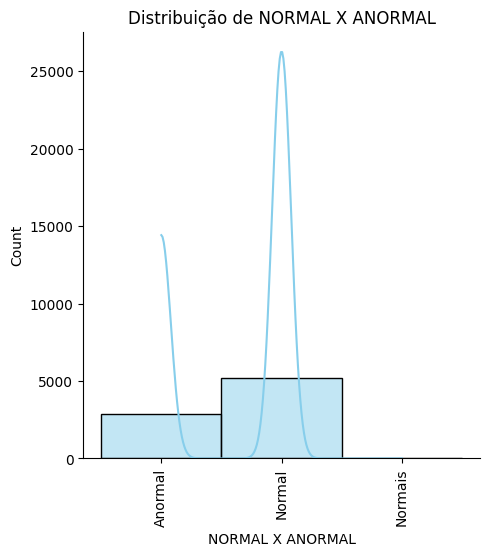

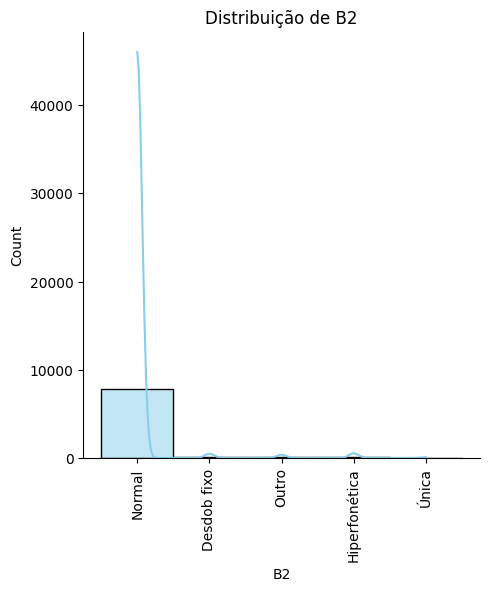

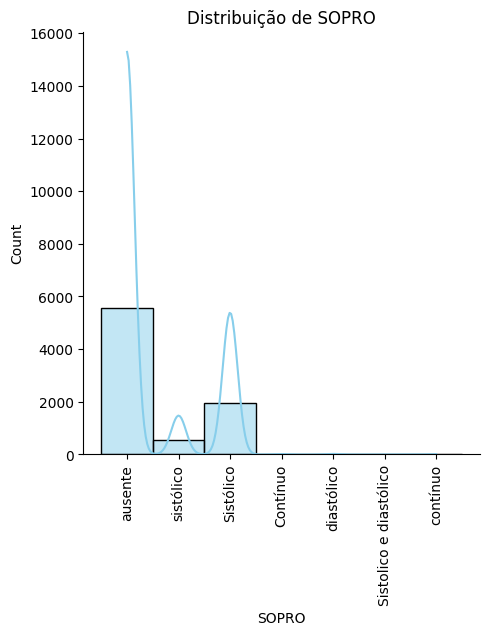

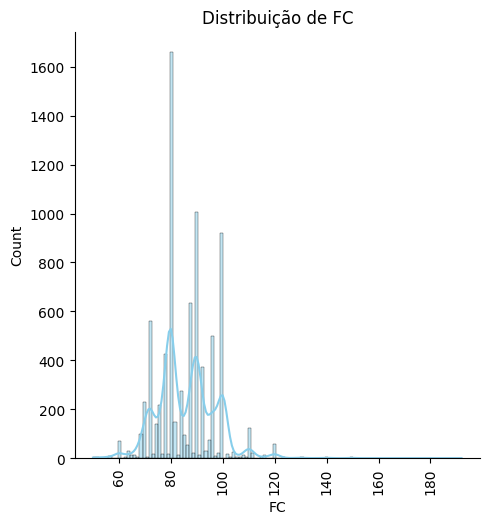

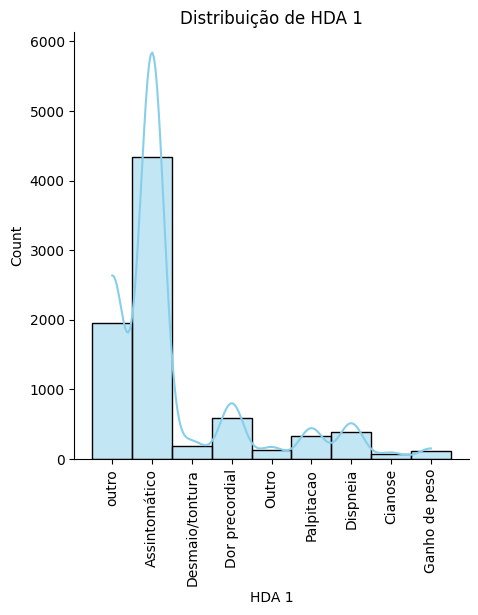

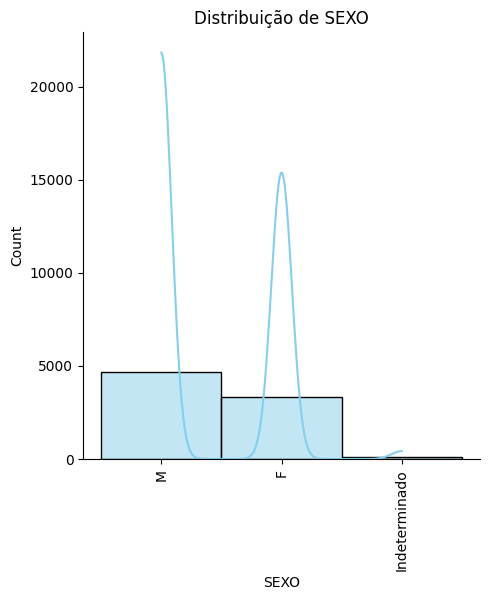

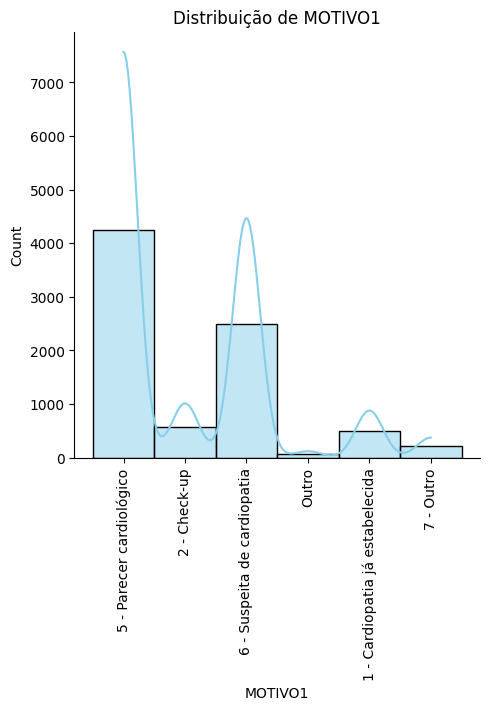

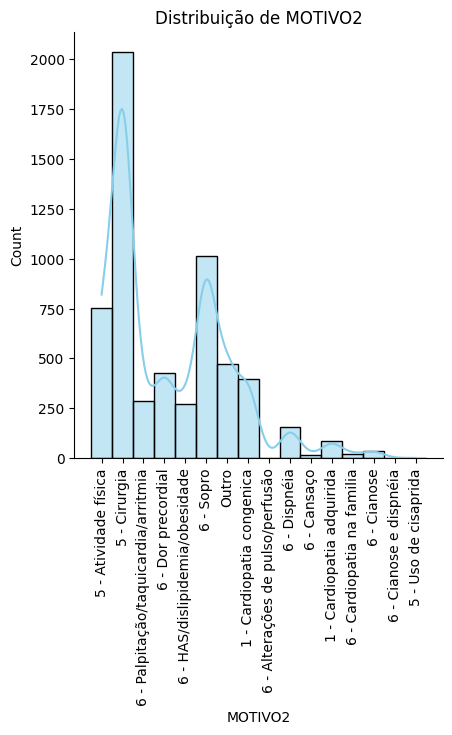

In [913]:
var = df.columns.tolist()

for col in var:
    sns.displot(df[col], kde=True, color = 'skyblue')
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.xticks(rotation=90)

In [356]:
df.head()

,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,SEXO,MOTIVO1
4,39.5,142,20.0,9.60,Normais,85.0,50.0,Não calculado,Anormal,Normal,ausente,90.0,outro,M,5 - Parecer cardiológico
5,26.0,112,21.0,4.40,Normais,100.0,60.0,Não calculado,Anormal,Desdob fixo,ausente,100.0,Assintomático,M,2 - Check-up
7,28.0,117,20.0,5.89,Normais,110.0,65.0,Não calculado,Anormal,Normal,ausente,80.0,Assintomático,F,5 - Parecer cardiológico
10,24.5,122,16.0,6.24,Normais,100.0,65.0,Não calculado,Anormal,Normal,sistólico,88.0,Assintomático,M,5 - Parecer cardiológico
12,42.0,0,18.5,15.50,Normais,100.0,60.0,Não calculado,Normal,Normal,ausente,52.0,Assintomático,M,2 - Check-up


In [915]:
df.to_csv('UCMF_Tratado.csv', index=False)


In [916]:
from google.colab import files
files.download('UCMF_Tratado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **- Gráfico de correlação das variáveis**

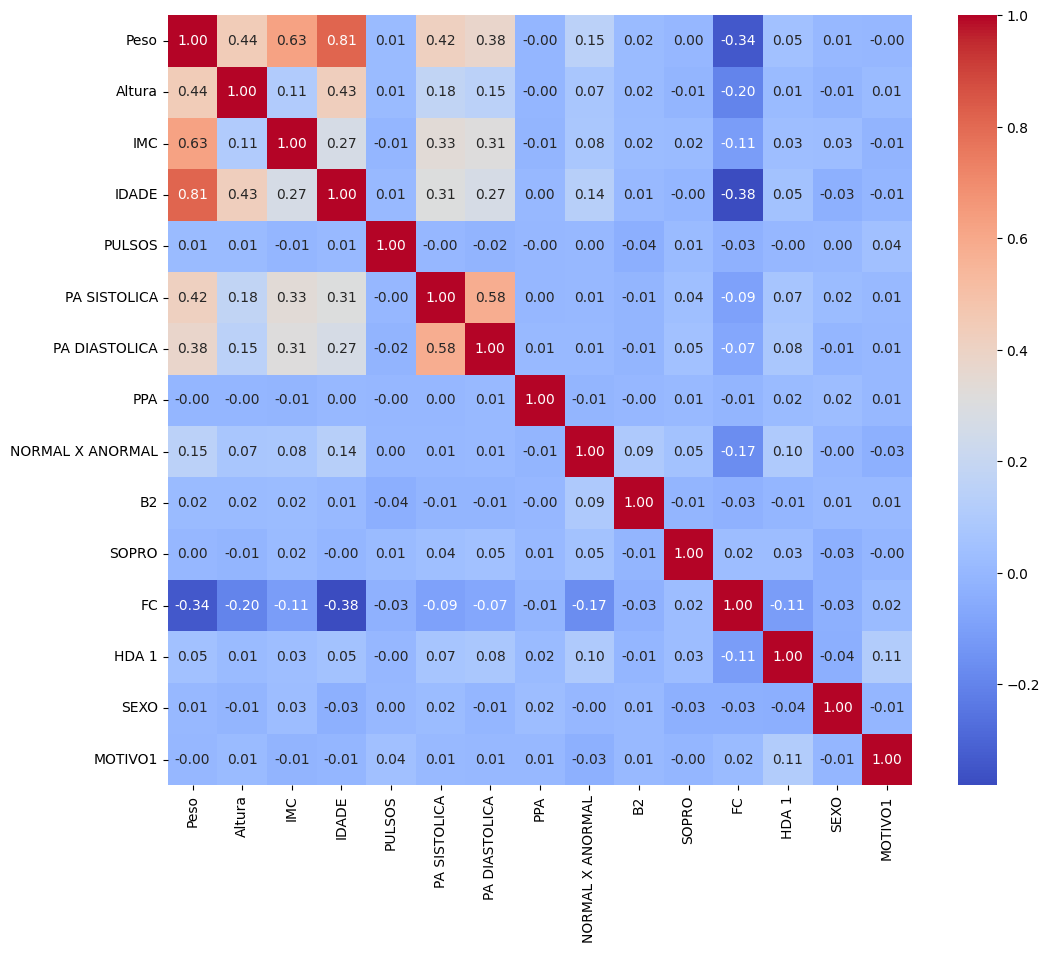

In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Criar uma cópia do DataFrame original
df_numeric = df.copy()

# Identificar colunas categóricas
categorical_cols = df_numeric.select_dtypes(include=['object', 'category']).columns.tolist()

# Inicializar o LabelEncoder
le = LabelEncoder()

# Converter colunas categóricas em numéricas
for col in categorical_cols:
    df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))

# Calcular a matriz de correlação incluindo a variável target 'NORMAL X ANORMAL'
corr_matrix = df_numeric.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [362]:
# Verificar o tipo de dados e valores nulos
print(df.info())
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 8075 entries, 4 to 17872
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Peso              8075 non-null   float64
 1   Altura            8075 non-null   int64  
 2   IMC               8075 non-null   float64
 3   IDADE             8075 non-null   float64
 4   PULSOS            8075 non-null   int64  
 5   PA SISTOLICA      8075 non-null   float64
 6   PA DIASTOLICA     8075 non-null   float64
 7   PPA               8075 non-null   int64  
 8   NORMAL X ANORMAL  8075 non-null   int64  
 9   B2                8075 non-null   int64  
 10  SOPRO             8075 non-null   int64  
 11  FC                8075 non-null   float64
 12  HDA 1             8075 non-null   int64  
 13  SEXO              8075 non-null   int64  
 14  MOTIVO1           8075 non-null   int64  
dtypes: float64(6), int64(9)
memory usage: 1.2 MB
None
Peso                0
Altura              0

In [363]:
# Converter variáveis categóricas em numéricas
for col in df.select_dtypes(include=['object']):
    df[col] = pd.factorize(df[col])[0]


In [364]:
# Preencher nulos com a mediana nas colunas numéricas (exceto target)
df = df.fillna(df.median(numeric_only=True))


In [365]:
# Exibir correlações com target (ignorar valores nulos na target)
correlacoes = df.dropna(subset=['NORMAL X ANORMAL']).corr()['NORMAL X ANORMAL'].sort_values(ascending=False)
print("Correlação com target:")
print(correlacoes)


Correlação com target:
NORMAL X ANORMAL    1.000000
Peso                0.149831
IDADE               0.135627
IMC                 0.078673
Altura              0.072844
SEXO                0.019592
PA DIASTOLICA       0.013237
PPA                 0.011386
PA SISTOLICA        0.006198
HDA 1              -0.028773
PULSOS             -0.054224
FC                 -0.165744
B2                 -0.185582
MOTIVO1            -0.232211
SOPRO              -0.805426
Name: NORMAL X ANORMAL, dtype: float64
